In [3]:
"""
R001_Fall_2023_AI_Reproducibility__
|
R001_Visualizations.ipynb
Created on Sun Nov 12 23:20:06 2023
@author: Rochana Obadage
"""

'\nR001_Fall_2023_AI_Reproducibility__\n|\nR001_Extract_Citing_Paper_Details_from_S2GA.ipynb\nCreated on Thu Sep 21 14:36:12 2023\n@author: Rochana Obadage\n'

In [1]:
# !pip list

!python --version

Python 3.9.13


# ``Creating related visualizations for R_001 - Drawing Graphs ...`` 

### `dependencies`
> <font face="consolas" color='#000080'><b>1. python:</b><br> 
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;3.8.17&emsp;&emsp;|&emsp;&emsp;3.9.13<br><br>
<b>2. Jupyter Notebook:</b><br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;notebook server: 6.5.4<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Kernel Information: Python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]<br><br>
<b>3. conda installations:</b><br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;pandas==2.0.3<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Beatifulsoup4==4.11.1<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Selenium==4.11.2<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;conda install -c conda-forge selenium<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;webdriver-manager=4.0.0<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;conda install -c conda-forge webdriver-manager<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;bibtexparser-1.4.0<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;conda install -c conda-forge bibtexparser!<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;pdfminer.six-20221105<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;conda install -c conda-forge pdfminer.six<br>

</font>


In [3]:
from bs4 import BeautifulSoup, NavigableString, Tag
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from selenium.webdriver.chrome.service import Service as ChromeService 
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.common.action_chains import ActionChains

from bibtexparser.bparser import BibTexParser
from bibtexparser.customization import convert_to_unicode
from pdfminer.high_level import extract_pages

import pandas as pd
import requests
import json
import urllib
import time
import string
import os
import shutil
import math
import json
import glob
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import bibtexparser

## ``rs_score from parsed "results"``

In [94]:
#RS_SCORE distribution
df_excel = pd.read_excel('RS_ALL_IN_ONE_metadata.xlsx',sheet_name="Sheet1")
print(len(df_excel['rs_score']))
len(df_excel[df_excel['rs_score']!='NOT_RELEVANT']['rs_score'].astype(float))

149


145

[0.43, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 0.6, 0.4, 1.0, 0.875, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.67, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.83, 1.0, 1.0, 0.67, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67, 0.75, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.59, 1.0, 1.0, 1.0, 1.0, 1.0, 0.85, 0.83, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.67, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.25, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]


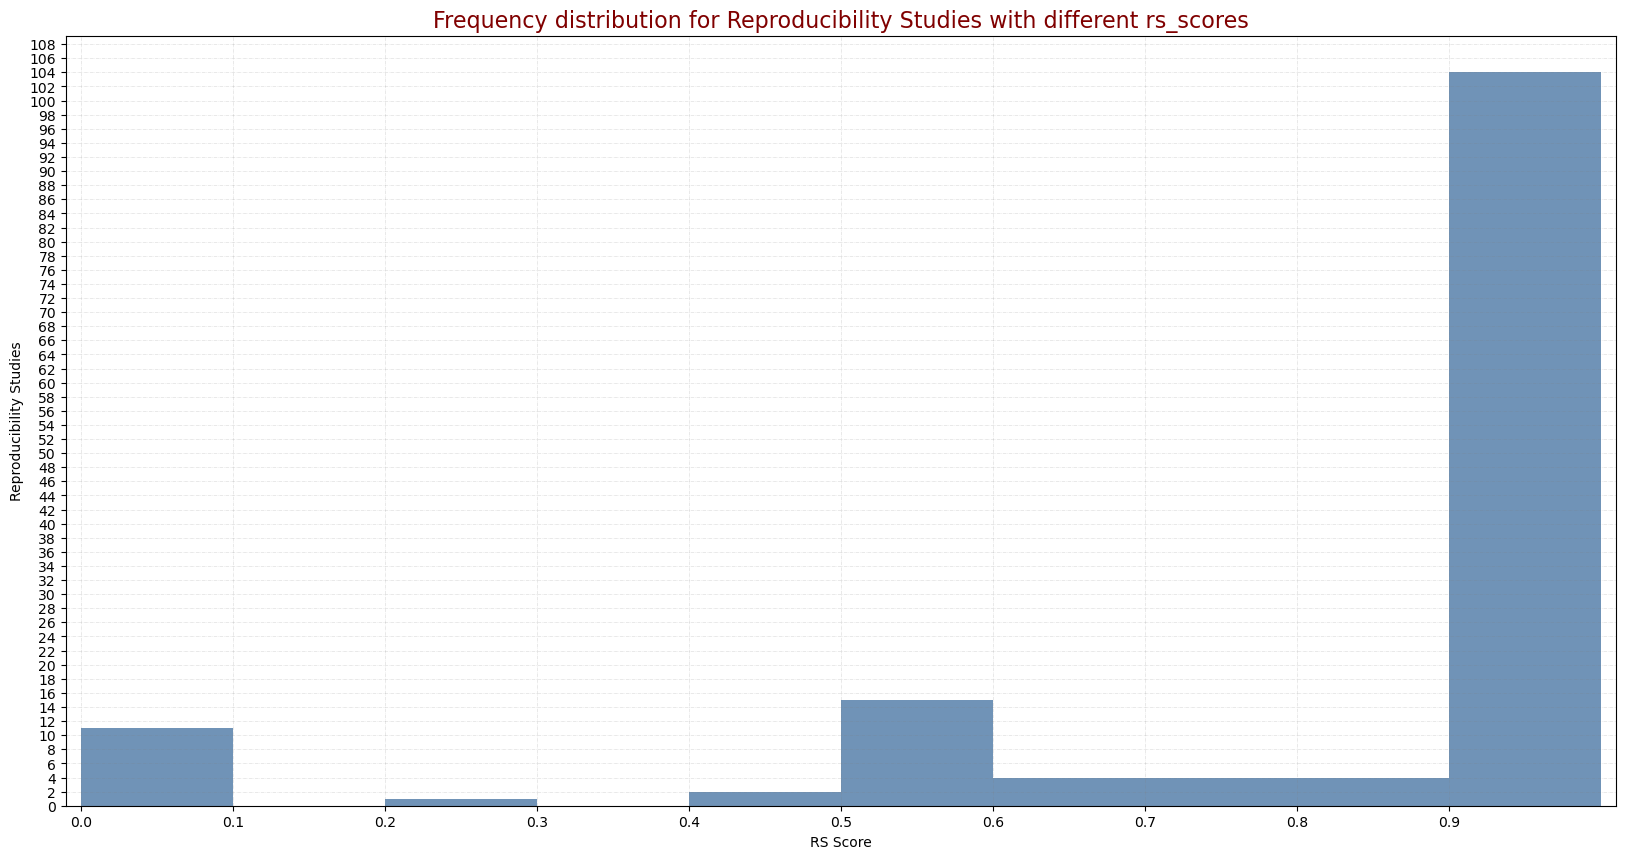

In [25]:
# Figure 002 - Frequency distribution for number of countires with different survey counts
fig = plt.figure(figsize = (20, 10))
 
x = df_excel[df_excel['rs_score']!='NOT_RELEVANT']['rs_score'].astype(float)
print(list(x))
num_bins = 10

plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 120, step=2))

plt.xlabel("RS Score",fontsize=10)
plt.ylabel("Reproducibility Studies",fontsize=10)
plt.title("Frequency distribution for Reproducibility Studies with different rs_scores",fontsize=16, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.margins(x=0.01, tight=True)

plt.hist(x, num_bins, density=False,color=(0.2, 0.4, 0.6, 0.7),width = 1/num_bins)
plt.savefig("plots/R_001_Figure_002_10_bins.png",pad_inches=1)
plt.show()

## ``visualizations on citing paper counts obtained from S2GA``

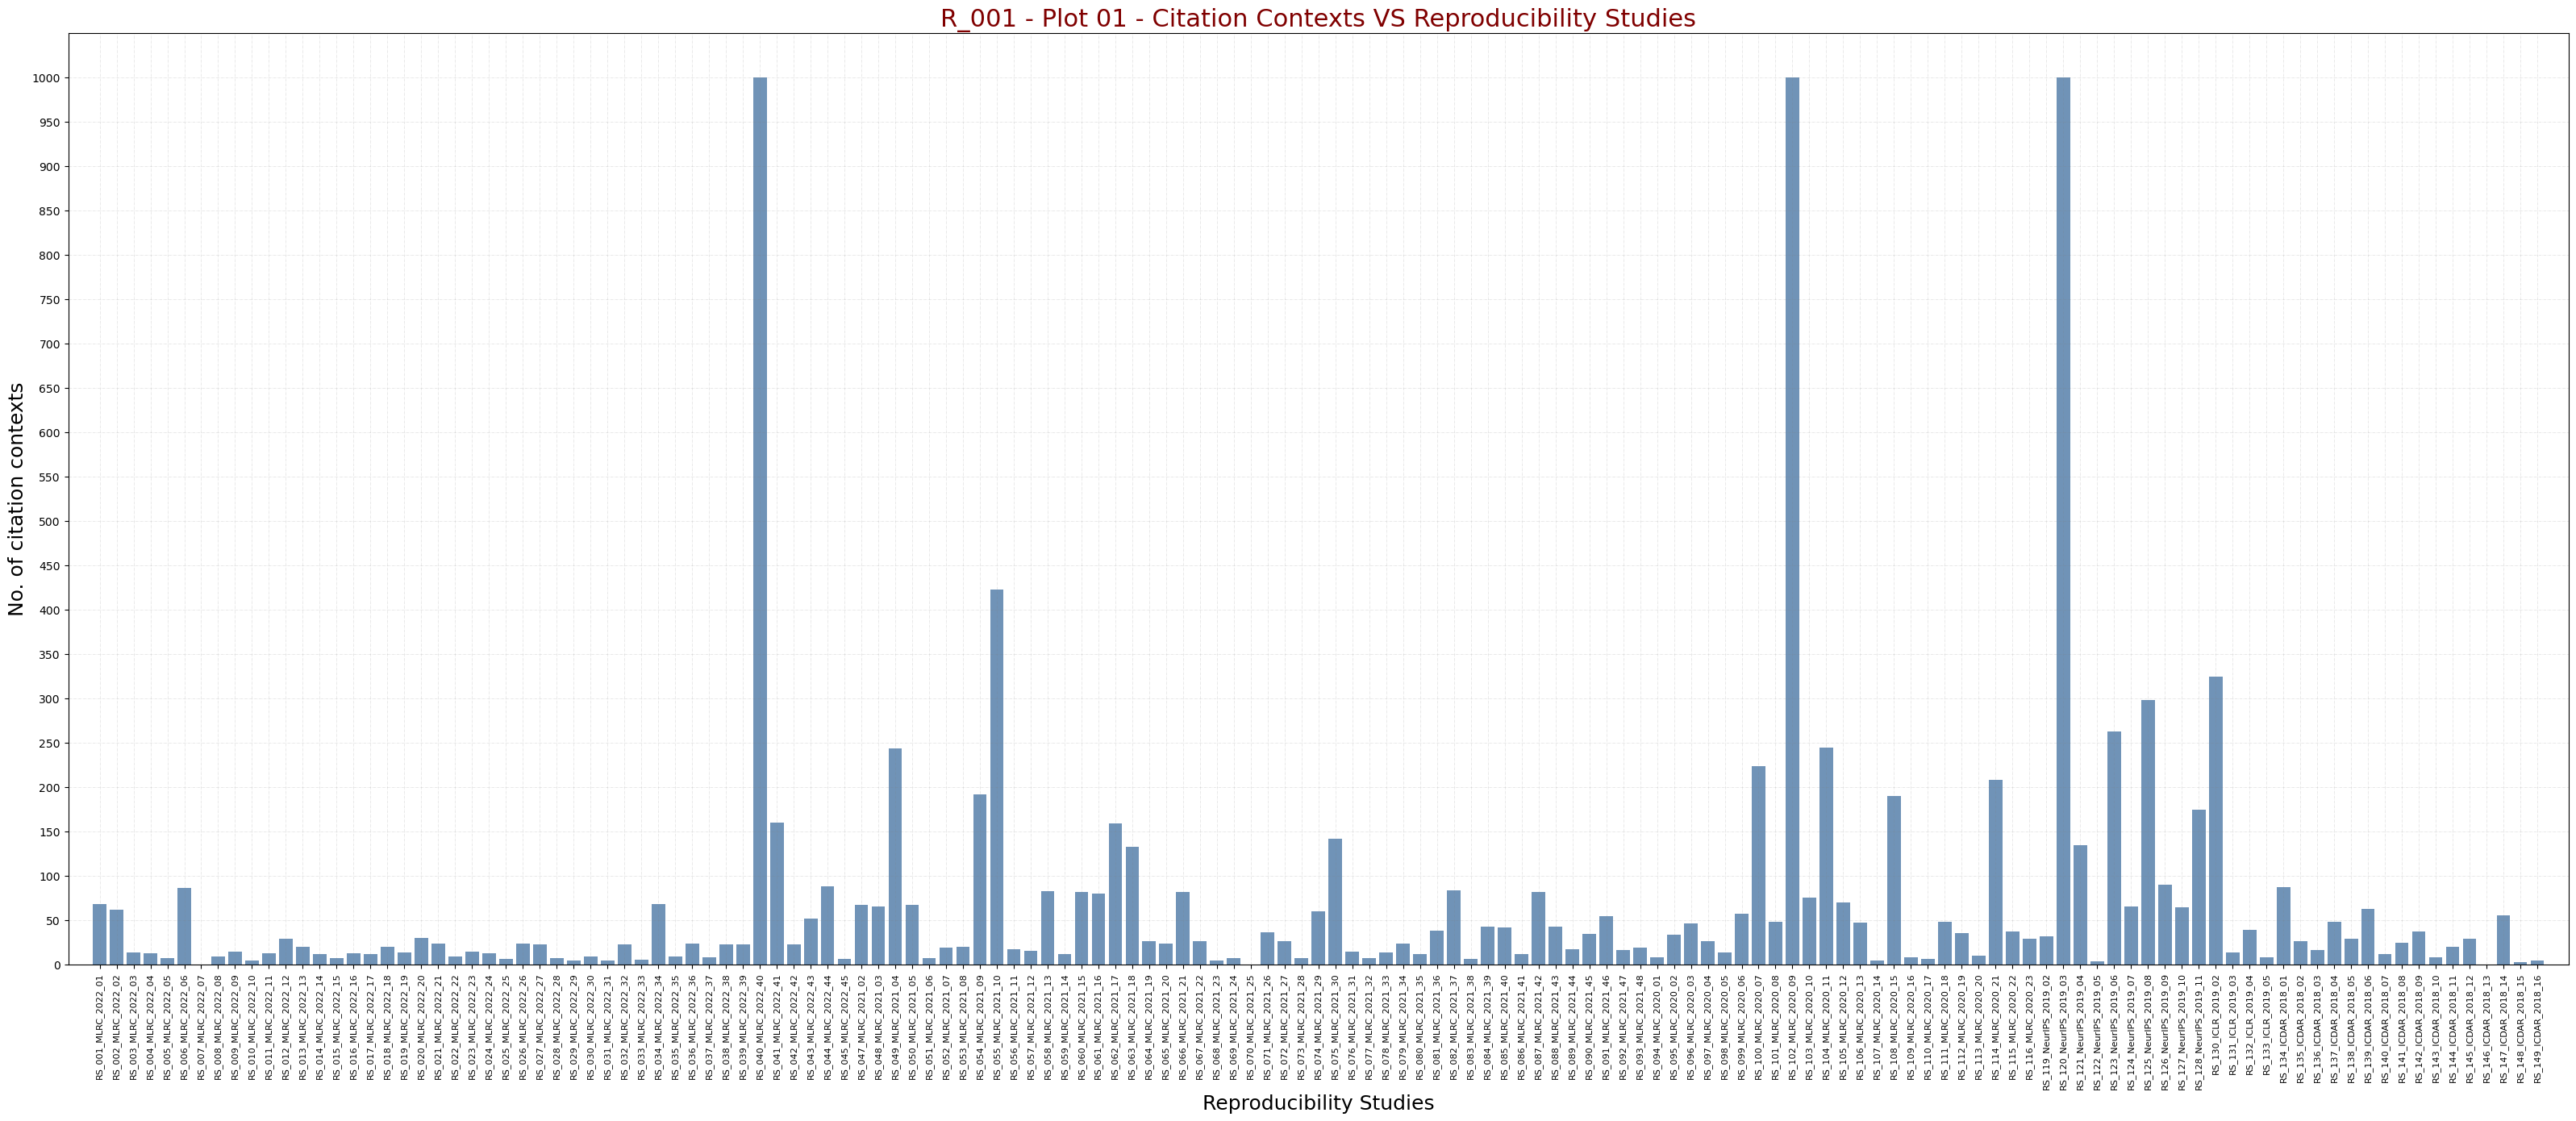

In [80]:
data = {}

with open('citation_counts_for_cited_papers.json') as f:
    data = json.load(f)

keys_ = list(data.keys())
counts = list(data.values())
  
fig = plt.figure(figsize = (40, 15))
 
# creating the bar plot
plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 1001, step=50))

plt.xlabel("Reproducibility Studies",fontsize=18)
plt.ylabel("No. of citation contexts",fontsize=18)
plt.title("R_001 - Plot 01 - Citation Contexts VS Reproducibility Studies",fontsize=22,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.margins(x=0.01, tight=True)

plt.show()

In [21]:
# data
pd.set_option('display.max_columns', None)

In [340]:
#Frequency distribution for citing papers

df_excel = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
print(len(df_excel['rs_score']))
len(df_excel[df_excel['rs_score']!='NOT_RELEVANT']['rs_score'].astype(float))

new_df = df_excel[df_excel['rs_score']!='NOT_RELEVANT']
new_df

149


,key_for_all_RS,title_rs,authors_rs,article_type,keywords,abstract,pdf_url_rs,code_url_rs,org_paper_url,doi_rs,...,volume_journal_rs,issue_journal_rs,published_year_journal_rs,domain,entry_type,rs_score,total_claims_or_attempts,results_threshold,rs_score_comment,rs_comment
0,RS_001_MLRC_2022_01,[Re] $\mathcal{G}$-Mixup: Graph Data Augmentat...,"['Ermin Omeragic', 'Vuk ÄuranoviÄ‡']",Replication,"['rescience c', 'machine learning', 'data augm...",Scope of Reproducibility\nThis paper presents ...,/pdf/8c87cb1e84e1482826c40a3b0c43928eaef747f3.pdf,NaN,https://proceedings.mlr.press/v162/han22c.html,https://www.doi.org/10.5281/zenodo.8173650,...,NaN,NaN,NaN,ML Reproducibility Challenge 2021,article,0.43,8,Not given,3.5/8,Results — Due to many missing implementation d...
1,RS_002_MLRC_2022_02,[Re] Exact Feature Distribution Matching for A...,"['Mert Erkol', 'Furkan KÄ±nlÄ±', 'BarÄ±ÅŸ Ã–zc...",Replication,"['feature distribution matching', 'style trans...",Reproducibility Summary:\n\nIn this reproducib...,/pdf/7bcb577c2a46db29c48234a5b72368053c7ebed3.pdf,NaN,https://openaccess.thecvf.com/content/CVPR2022...,https://www.doi.org/10.5281/zenodo.8173652,...,NaN,NaN,NaN,ML Reproducibility Challenge 2021,article,1,5,Not given,Although our experimental results are not\nide...,Results — We have reproduced the experiments d...
2,RS_003_MLRC_2022_03,[Re] End-to-end Algorithm Synthesis with Recur...,"['Sean Michael McLeish', 'Long Tran-Thanh']",Replication,"['rescience c', 'Algorithmic Reasoning', 'Deep...","Scope of Reproducibility:\nIn this report, we ...",/pdf/07d5d68b5873d779bd1fd8c95b9767cb57fe0bc4.pdf,NaN,https://arxiv.org/pdf/2202.05826.pdf,https://www.doi.org/10.5281/zenodo.8173654,...,NaN,NaN,NaN,ML Reproducibility Challenge 2021,article,1,3,Not given,apart from perturbation testing for which we p...,Results — We verify the authors’ claims by rep...
3,RS_004_MLRC_2022_04,[Re] Label-Free Explainability for Unsupervise...,"['Eric Langezaal', 'Jesse Belleman', 'Joeri No...",Replication,"['Reproducibility', 'label-free', 'unsupervise...",Scope of Reproducibility â€” This study is an ...,/pdf/7fde4f12c675150699fc376cd097d5b9dad0b4d4.pdf,NaN,https://proceedings.mlr.press/v162/crabbe22a.html,https://www.doi.org/10.5281/zenodo.8173656,...,NaN,NaN,NaN,ML Reproducibility Challenge 2021,article,1,3,Not given,"Our results differ in some minor aspects, but ...",Results — We find that the three main claims o...
4,RS_005_MLRC_2022_05,[Re] Exploring the Representation of Word Mean...,"['Matteo Brivio', 'Cagri Coltekin']",Replication,"['BERT', 'fastText', 'embeddings', 'language m...",This report summarizes our efforts to reproduc...,/pdf/78430c5af33bc892d852b49a5a6e93abeb314c6f.pdf,NaN,https://aclanthology.org/2021.acl-long.281/,https://www.doi.org/10.5281/zenodo.8173658,...,NaN,NaN,NaN,ML Reproducibility Challenge 2021,article,0.75,4,Not given,We only manage to partially reproduce the orig...,Results — We only manage to partially reproduc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,RS_145_ICDAR_2018_12,LGPMA: Complicated Table Structure Recognition...,"[Liang Qiao, Zaisheng Li, Zhanzhan Cheng, Peng...",original,[test],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,article,0,1,not reproducible based on Kenny's study,NaN,Non-Reproducible - Kenny's Remarks
145,RS_146_ICDAR_2018_13,Deep-learning and graph-based approach to tabl...,"[Lee, E., Park, J., Koo, H.I. et al.]",original,[test],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,article,1,1,The source code was executed without errors an...,NaN,Reproducible - Kenny's Remarks
146,RS_147_ICDAR_2018_14,Global Table Extractor (GTE): A Framework for ...,"Zheng, Xinyi and Burdick, Douglas and Popa, Lu...",original,[test],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,article,0,1,not reproducible based on Kenny's study,NaN,Non-Reproducible - Kenny's Remarks
147,RS_148_ICDAR_2018_15,TSR-DSAW: Table Structure Recognition via Deep...,[Arushi Jain and Shubham Paliwal and Monika Sh...,

Axes(0.36,0.4;0.45x0.4)
[141, 160, 34, 16, 10, 226, 0, 21, 11, 3, 16, 56, 37, 18, 13, 16, 8, 37, 19, 26, 55, 11, 21, 16, 5, 55, 50, 13, 3, 19, 24, 52, 9, 141, 14, 55, 13, 50, 50, 7748, 421, 63, 118, 319, 10, 177, 146, 505, 177, 13, 40, 51, 757, 1426, 68, 28, 328, 35, 113, 177, 269, 341, 73, 46, 113, 73, 2, 11, 0, 58, 73, 13, 140, 660, 26, 11, 44, 52, 21, 74, 270, 15, 255, 74, 46, 113, 61, 68, 131, 140, 63, 36, 58, 110, 95, 74, 59, 223, 962, 127, 5228, 350, 812, 151, 136, 34, 528, 58, 51, 302, 173, 49, 1134, 91, 51, 154, 4720, 510, 38, 1069, 341, 1712, 428, 322, 614, 1837, 110, 112, 43, 482, 55, 44, 137, 124, 222, 22, 68, 129, 16, 39, 90, 0, 173, 4, 4]


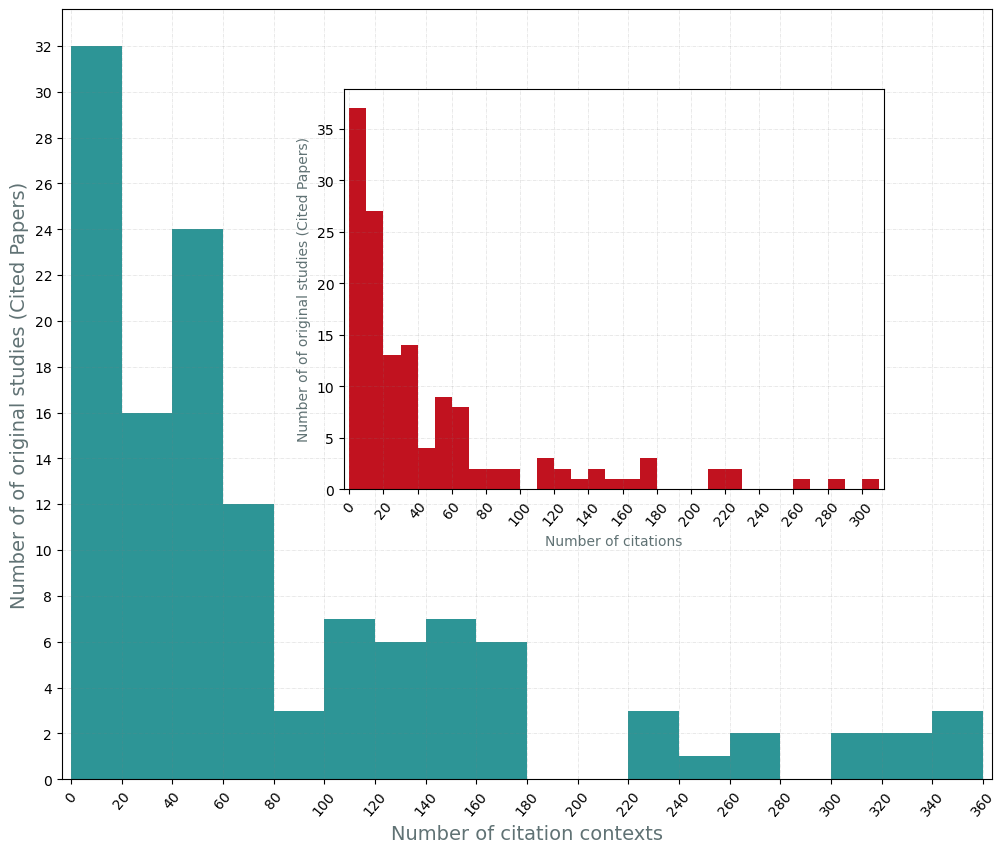

In [398]:
# Adding the inset
import matplotlib.pyplot as plt
fig, ax2 = plt.subplots(figsize = (12, 10))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.36, 0.4, 0.45, 0.4]
ax1 = fig.add_axes([left, bottom, width, height])
print(ax1)

x = list(new_df['total_context_count_for_labelling']) #.astype(int)
x1 = list(new_df['citing_paper_count']) #.astype(int)
x1 = [i for i in x1 if i<400]
print(x)

binwidth = 10
ax1.set(xticks=np.arange(0, 400, step=binwidth*2)) #, xticklabels=labels)
ax1.set(yticks=np.arange(0, 95, step=5))
ax1.tick_params(axis='x', labelrotation=50)

ax1.set_xlabel("Number of citations",fontsize=10,color='#607274')
ax1.set_ylabel("Number of of original studies (Cited Papers)",fontsize=10,color='#607274')

ax1.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax1.margins(x=0.01, tight=True)
ax1.hist(x1, bins=np.arange(min(x1), max(x1) + binwidth, binwidth),color='#c1121f',density=False)

binwidth_2 = 20
x2 = [i for i in x if i<400]
ax2.set(xticks=np.arange(0, 400, step=binwidth_2)) #, xticklabels=labels)
ax2.set(yticks=np.arange(0, 100, step=2))

ax2.tick_params(axis='x', labelrotation=50)
ax2.set_xlabel("Number of citation contexts",fontsize=14,color='#607274')
ax2.set_ylabel("Number of of original studies (Cited Papers)",fontsize=14,color='#607274')

ax2.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax2.margins(x=0.01, tight=True)

ax2.hist(x2, bins=np.arange(min(x2), max(x2) + binwidth_2, binwidth_2),color='#2D9596',density=False)

plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)
0      57
1      38
2      15
3       6
4       6
       ..
144    28
145     0
146    59
147     2
148     2
Name: valid_citation_context_count, Length: 149, dtype: int64


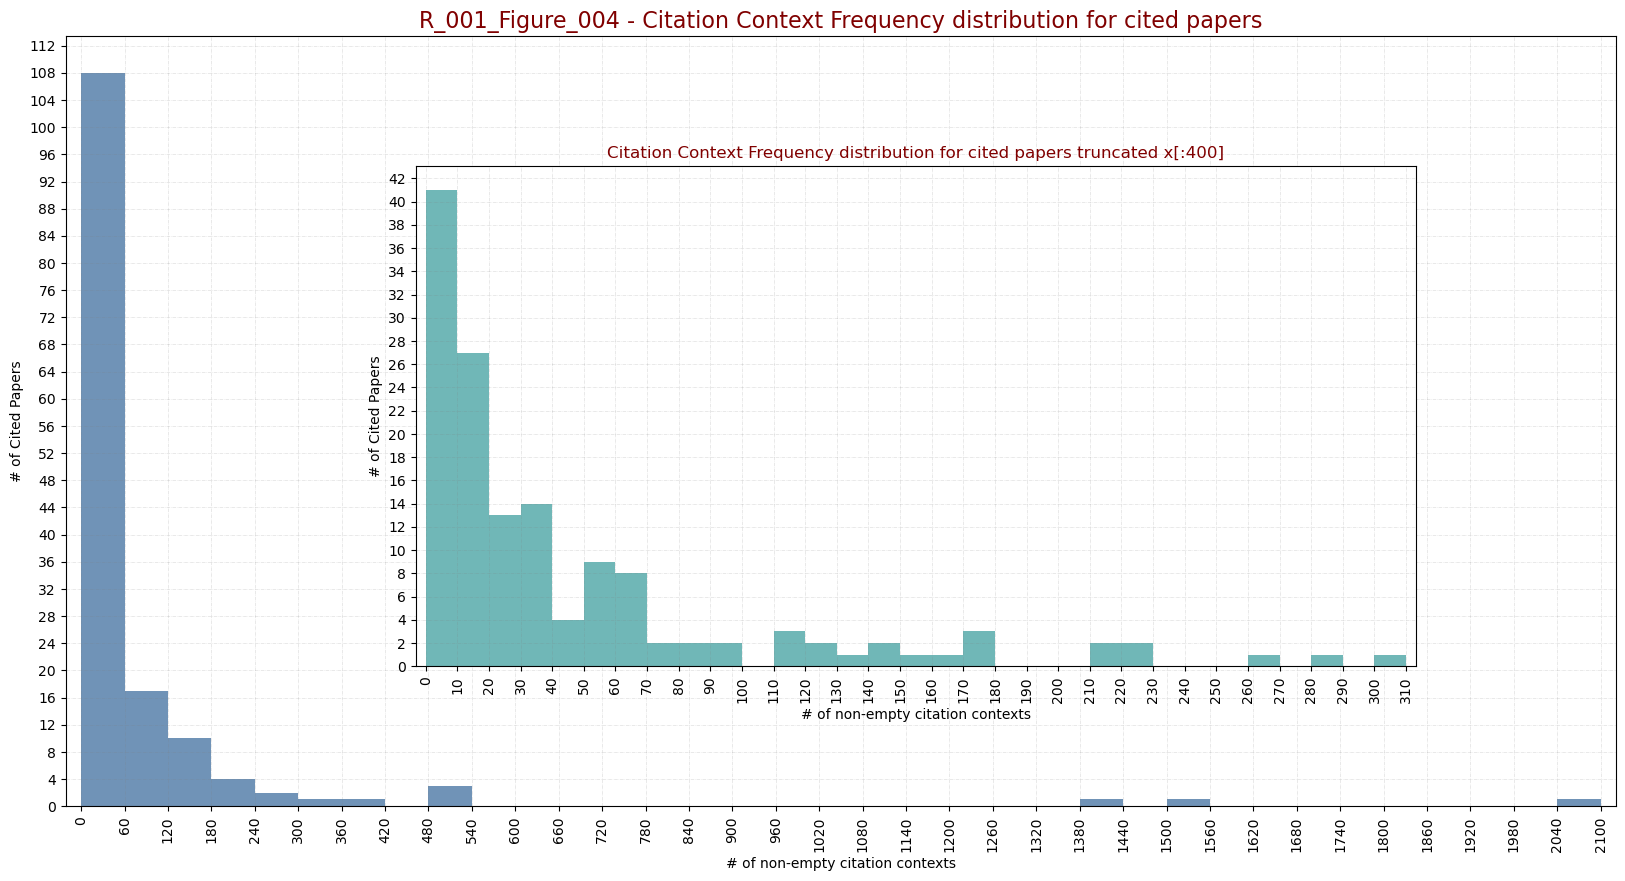

In [50]:
# Adding the inset -- Citation Context Frequency distribution for cited papers
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (20, 10))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.3, 0.25, 0.5, 0.5]
ax2 = fig.add_axes([left, bottom, width, height])

x = df_excel_["valid_citation_context_count"]

binwidth = 60
ax1.set(xticks=np.arange(0, 3000, step=binwidth)) #, xticklabels=labels)
ax1.set(yticks=np.arange(0, 120, step=4))
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_xlabel("# of non-empty citation contexts",fontsize=10)
ax1.set_ylabel("# of Cited Papers",fontsize=10)
ax1.set_title("R_001_Figure_004 - Citation Context Frequency distribution for cited papers",fontsize=16, color='maroon')
ax1.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax1.margins(x=0.01, tight=True)
ax1.hist(x, bins=np.arange(min(x), max(x) + binwidth, binwidth),color=(0.2, 0.4, 0.6, 0.7),density=False)


binwidth_2 = 10
x2 = [i for i in x if i<311]
ax2.set(xticks=np.arange(0, 311, step=binwidth_2)) #, xticklabels=labels)
ax2.set(yticks=np.arange(0, 100, step=2))
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel("# of non-empty citation contexts",fontsize=10)
ax2.set_ylabel("# of Cited Papers",fontsize=10)
ax2.set_title("Citation Context Frequency distribution for cited papers truncated x[:400]",fontsize=12, color='maroon')
ax2.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax2.margins(x=0.01, tight=True)
ax2.hist(x2, bins=np.arange(min(x2), max(x2) + binwidth_2, binwidth_2),color=(0.2, 0.6, 0.6, 0.7),density=False)

plt.savefig("plots/R_001_Figure_004_Citation_Context_Frequency_distribution_for_cited_papers.png",pad_inches=1)

plt.show()

## ``visualizations on context labelling``

In [29]:
# already_labelled_list = [i.replace("Citing_Paper_contexts_lables\\","") for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
already_labelled_list

['Citing_Paper_contexts_lables\\RS_008_MLRC_2022_08.json',
 'Citing_Paper_contexts_lables\\RS_011_MLRC_2022_11.json',
 'Citing_Paper_contexts_lables\\RS_014_MLRC_2022_14.json',
 'Citing_Paper_contexts_lables\\RS_020_MLRC_2022_20.json',
 'Citing_Paper_contexts_lables\\RS_039_MLRC_2022_39.json',
 'Citing_Paper_contexts_lables\\RS_045_MLRC_2022_45.json',
 'Citing_Paper_contexts_lables\\RS_052_MLRC_2021_07.json',
 'Citing_Paper_contexts_lables\\RS_062_MLRC_2021_17.json',
 'Citing_Paper_contexts_lables\\RS_073_MLRC_2021_28.json',
 'Citing_Paper_contexts_lables\\RS_085_MLRC_2021_40.json',
 'Citing_Paper_contexts_lables\\RS_132_ICLR_2019_04.json',
 'Citing_Paper_contexts_lables\\RS_134_ICDAR_2018_01.json',
 'Citing_Paper_contexts_lables\\RS_135_ICDAR_2018_02.json',
 'Citing_Paper_contexts_lables\\RS_137_ICDAR_2018_04.json',
 'Citing_Paper_contexts_lables\\RS_138_ICDAR_2018_05.json',
 'Citing_Paper_contexts_lables\\RS_140_ICDAR_2018_07.json',
 'Citing_Paper_contexts_lables\\RS_141_ICDAR_2018_0

In [53]:
all_files = {} # filename:item, filename:item 

for file in already_labelled_list:
    file_key = file.replace("Citing_Paper_contexts_lables\\","").replace(".json","")
    with open(file,'r') as f1:
        data = json.load(f1)

        label_scores = {'-2':0,'-1':0,'0':0,'0.5':0,'1':0}

        for data_item in data['data']:

            for i in data_item['context_scores']:
                score = i.get("label_score"))

                if score == 1:
                    label_scores['1'] += 1
    #                 label = "Strong"
                elif score == 0.5:
                    label_scores['0.5'] += 1
    #                 label = "Weak"
                elif score == 0:
                    label_scores['0'] += 1
    #                 label = "Neutral"
                elif score == -1:
                    label_scores['-1'] += 1
    #                 label = "P-NR"
                elif score == -2:
                    label_scores['-2'] += 1
    #                 label = "O-NR"   
    
        all_files.update({file_key:label_scores})

with open("citation_context_label_summary.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files

{'RS_008_MLRC_2022_08': {'-2': 0, '-1': 0, '0': 17, '0.5': 4, '1': 0},
 'RS_011_MLRC_2022_11': {'-2': 0, '-1': 0, '0': 13, '0.5': 3, '1': 0},
 'RS_014_MLRC_2022_14': {'-2': 0, '-1': 0, '0': 12, '0.5': 6, '1': 0},
 'RS_020_MLRC_2022_20': {'-2': 0, '-1': 0, '0': 26, '0.5': 0, '1': 0},
 'RS_039_MLRC_2022_39': {'-2': 0, '-1': 0, '0': 48, '0.5': 2, '1': 0},
 'RS_045_MLRC_2022_45': {'-2': 0, '-1': 0, '0': 10, '0.5': 0, '1': 0},
 'RS_052_MLRC_2021_07': {'-2': 0, '-1': 0, '0': 36, '0.5': 4, '1': 0},
 'RS_062_MLRC_2021_17': {'-2': 0, '-1': 0, '0': 248, '0.5': 17, '1': 4},
 'RS_073_MLRC_2021_28': {'-2': 0, '-1': 0, '0': 11, '0.5': 2, '1': 0},
 'RS_085_MLRC_2021_40': {'-2': 0, '-1': 0, '0': 60, '0.5': 7, '1': 7},
 'RS_132_ICLR_2019_04': {'-2': 0, '-1': 1, '0': 105, '0.5': 4, '1': 2},
 'RS_134_ICDAR_2018_01': {'-2': 1, '-1': 4, '0': 447, '0.5': 25, '1': 5},
 'RS_135_ICDAR_2018_02': {'-2': 0, '-1': 0, '0': 54, '0.5': 1, '1': 0},
 'RS_137_ICDAR_2018_04': {'-2': 1, '-1': 1, '0': 126, '0.5': 9, '1': 0

In [54]:
# from collections import OrderedDict
from operator import getitem
sorted_all_files = dict(sorted(all_files.items(), key = lambda x: getitem(x[1], '0')))
print(sorted_all_files)

{'RS_148_ICDAR_2018_15': {'-2': 1, '-1': 0, '0': 3, '0.5': 0, '1': 0}, 'RS_149_ICDAR_2018_16': {'-2': 1, '-1': 0, '0': 3, '0.5': 0, '1': 0}, 'RS_045_MLRC_2022_45': {'-2': 0, '-1': 0, '0': 10, '0.5': 0, '1': 0}, 'RS_073_MLRC_2021_28': {'-2': 0, '-1': 0, '0': 11, '0.5': 2, '1': 0}, 'RS_014_MLRC_2022_14': {'-2': 0, '-1': 0, '0': 12, '0.5': 6, '1': 0}, 'RS_011_MLRC_2022_11': {'-2': 0, '-1': 0, '0': 13, '0.5': 3, '1': 0}, 'RS_008_MLRC_2022_08': {'-2': 0, '-1': 0, '0': 17, '0.5': 4, '1': 0}, 'RS_140_ICDAR_2018_07': {'-2': 1, '-1': 0, '0': 20, '0.5': 1, '1': 0}, 'RS_020_MLRC_2022_20': {'-2': 0, '-1': 0, '0': 26, '0.5': 0, '1': 0}, 'RS_052_MLRC_2021_07': {'-2': 0, '-1': 0, '0': 36, '0.5': 4, '1': 0}, 'RS_039_MLRC_2022_39': {'-2': 0, '-1': 0, '0': 48, '0.5': 2, '1': 0}, 'RS_135_ICDAR_2018_02': {'-2': 0, '-1': 0, '0': 54, '0.5': 1, '1': 0}, 'RS_141_ICDAR_2018_08': {'-2': 1, '-1': 1, '0': 59, '0.5': 7, '1': 0}, 'RS_085_MLRC_2021_40': {'-2': 0, '-1': 0, '0': 60, '0.5': 7, '1': 7}, 'RS_145_ICDAR_20

In [5]:
# count for each category
sum(map(lambda x: x['0'],all_files.values()))

1756

In [38]:
keys_new = list(map(lambda x: x['key_for_all_RS'][:6]+f"\nrs_score: {x['rs_score']}",sorted_rs_score_dicts_list))
keys_new

['RS_148\nrs_score: 0',
 'RS_149\nrs_score: 0',
 'RS_045\nrs_score: 1',
 'RS_073\nrs_score: 0.5',
 'RS_014\nrs_score: 1',
 'RS_011\nrs_score: 0.875',
 'RS_008\nrs_score: 0.6',
 'RS_140\nrs_score: 0',
 'RS_020\nrs_score: 0.67',
 'RS_052\nrs_score: 1',
 'RS_039\nrs_score: 0.75',
 'RS_135\nrs_score: 0',
 'RS_141\nrs_score: 0',
 'RS_085\nrs_score: 1',
 'RS_145\nrs_score: 0',
 'RS_132\nrs_score: 0.5',
 'RS_138\nrs_score: 0',
 'RS_142\nrs_score: 0',
 'RS_137\nrs_score: 0',
 'RS_147\nrs_score: 0',
 'RS_134\nrs_score: 0']

#### FIgure 05 with inset

Axes(0.125,0.11;0.775x0.77)


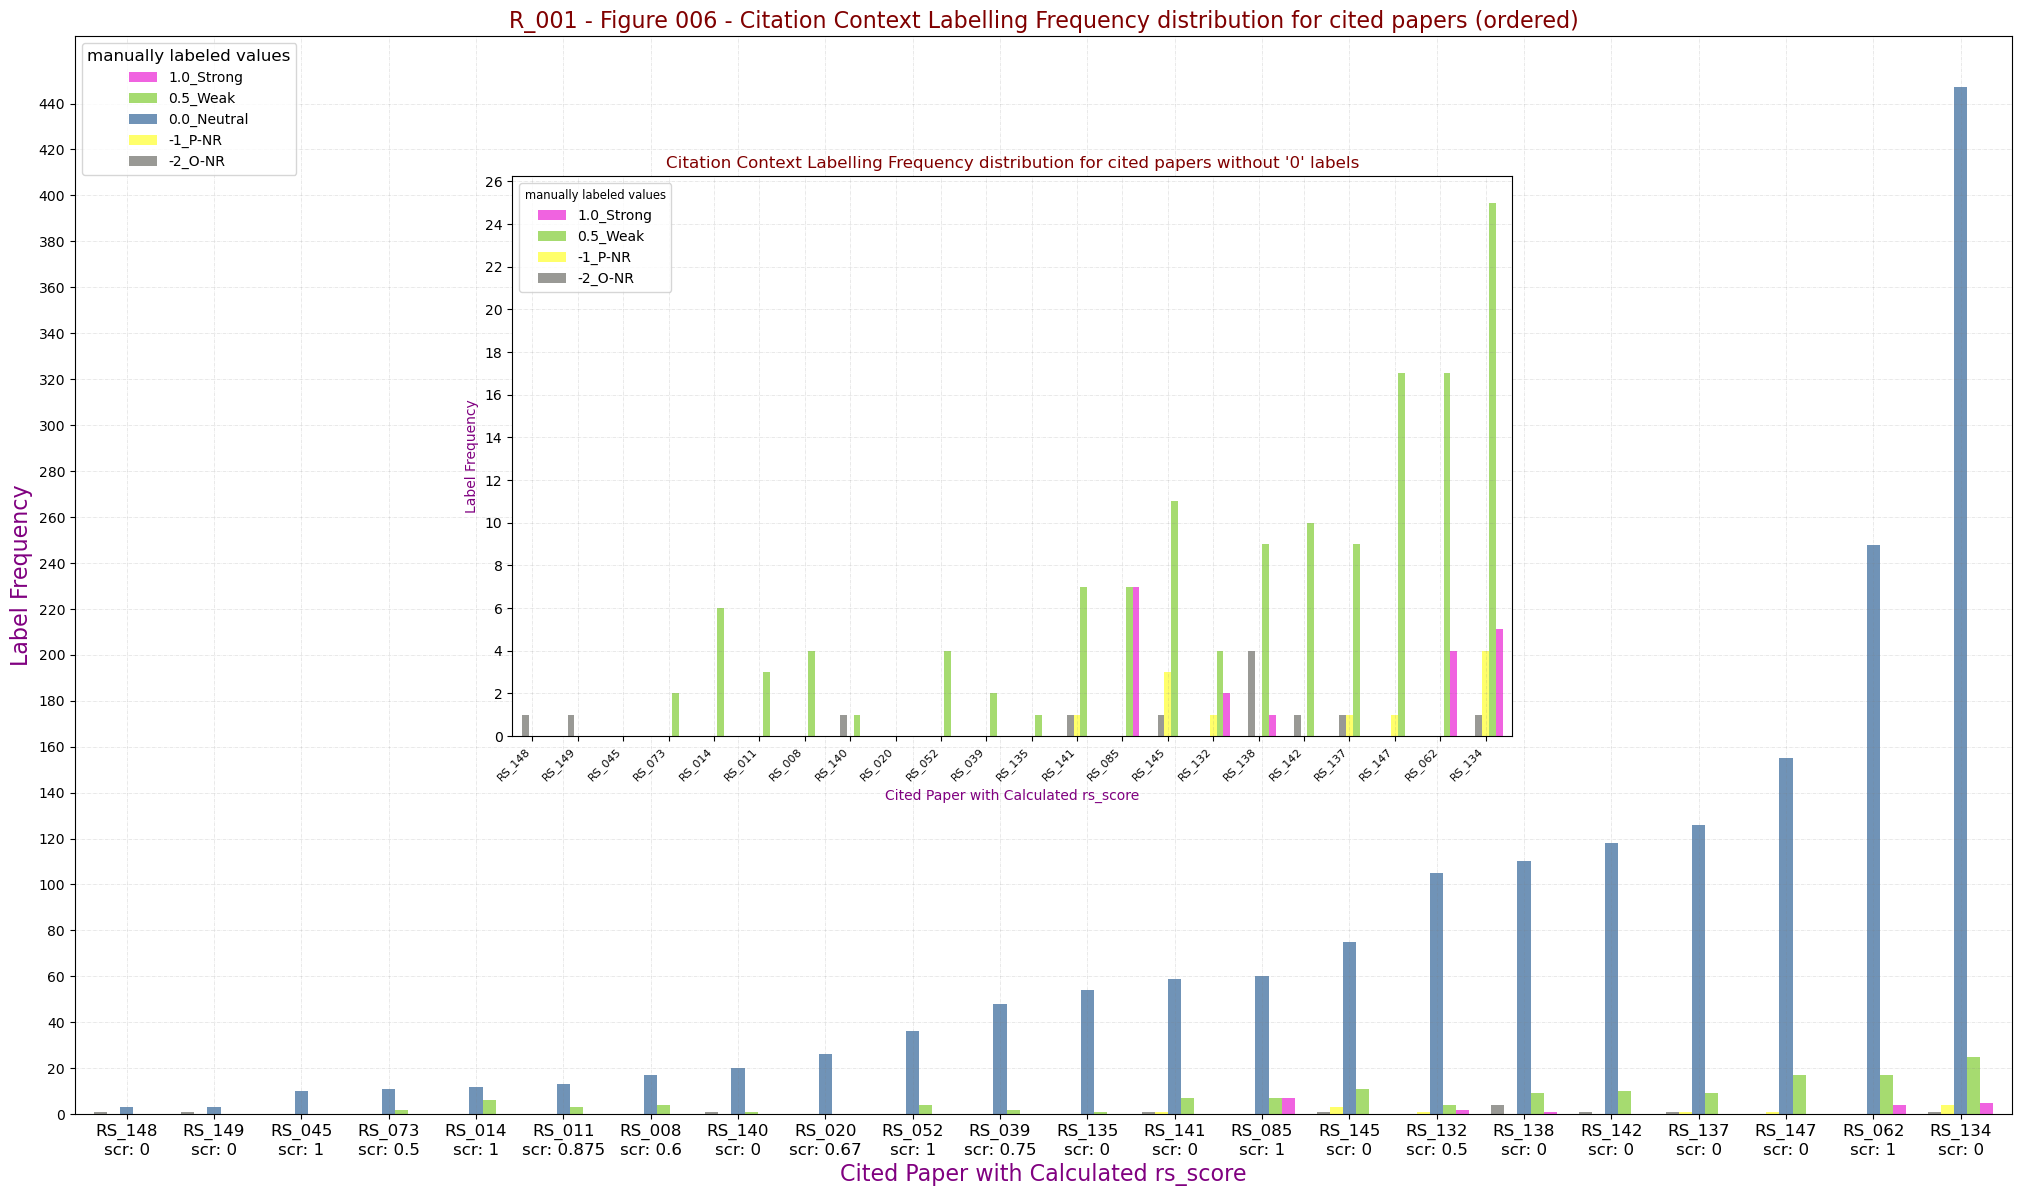

In [59]:
# #### FIgure 05 with inset + sorted based on '0' labels 

import matplotlib.pyplot as plt
import numpy as np

with open('citation_counts_for_cited_papers.json') as f:
    data = json.load(f)
    
Y_MAX = max(list(map(lambda x: x['0'],sorted_all_files.values())))
keys_ = list(map(lambda x: x['key_for_all_RS'][:6]+f"\nscr: {x['rs_score']}",sorted_rs_score_dicts_list))
values = list(all_files.values())

_strong = list(map(lambda x: x['1'],sorted_all_files.values())) 
_weak = list(map(lambda x: x['0.5'],sorted_all_files.values()))
_neutral = list(map(lambda x: x['0'] if x['0']<Y_MAX else Y_MAX, sorted_all_files.values())) # defining a upper bound for the ease of visualization -- max Y value is set to 80 
_p_nr = list(map(lambda x: x['-1'],sorted_all_files.values())) 
_o_nr = list(map(lambda x: x['-2'],sorted_all_files.values())) 

X = keys_

fig, ax1 = plt.subplots(figsize = (25, 14))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.3, 0.38, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

print(ax1)
X_axis = np.arange(len(X)) 

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

ax1.set(xticks=X_axis,xticklabels=X) #, xticklabels=labels)
ax1.tick_params(axis='x', labelsize=12)
ax1.set(yticks=np.arange(0, Y_MAX+1, step=20))
ax1.set_xlabel("Cited Paper with Calculated rs_score",fontsize=16,color='purple')
ax1.set_ylabel("Label Frequency",fontsize=16,color='purple')
ax1.set_title("R_001 - Figure 006 - Citation Context Labelling Frequency distribution for cited papers (ordered)",fontsize=16, color='maroon')

ax1.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax1.margins(x=0.01, tight=True)

ax1.bar(X_axis + 0.3, _strong, label = '1.0_Strong', color=colors['purple'], width = 0.15) 
ax1.bar(X_axis + 0.15, _weak, color=colors['green'], label = '0.5_Weak', width = 0.15) 
ax1.bar(X_axis , _neutral, label = '0.0_Neutral', color=colors['blue'], width = 0.15) 
ax1.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
ax1.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

ax1.legend(fontsize="10",title="manually labeled values",title_fontsize="large",fancybox=True) 

Y_MAX_INSET = max(list(map(lambda x: x['0.5'],sorted_all_files.values())))
inset_keys_ = list(map(lambda x: x['key_for_all_RS'][:6],sorted_rs_score_dicts_list))


ax2.set(xticks=X_axis,xticklabels=inset_keys_) #, xticklabels=labels)
ax2.set(yticks=np.arange(0, Y_MAX_INSET+2, step=2))
ax2.tick_params(axis='x', labelrotation=45, labelsize=8)
ax2.set_xticklabels(inset_keys_,ha='right')

ax2.set_xlabel("Cited Paper with Calculated rs_score",fontsize=10,color='purple')
ax2.set_ylabel("Label Frequency",fontsize=10,color='purple')
ax2.set_title("Citation Context Labelling Frequency distribution for cited papers without '0' labels",fontsize=12, color='maroon')
ax2.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax2.margins(x=0.01, tight=True)

ax2.bar(X_axis + 0.3, _strong, label = '1.0_Strong', color=colors['purple'], width = 0.15) 
ax2.bar(X_axis + 0.15, _weak, color=colors['green'], label = '0.5_Weak', width = 0.15) 
ax2.bar(X_axis, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
ax2.bar(X_axis - 0.15, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

ax2.legend(fontsize="10",title="manually labeled values",title_fontsize="small",fancybox=True) 

plt.savefig("plots/R_001_Figure_006_III.png")

plt.show()

# Sentiment Analysis - Citation 
```
model for pipeline
j-hartmann/sentiment-roberta-large-english-3-classes

@article{hartmann2021,
  title={The Power of Brand Selfies},
  author={Hartmann, Jochen and Heitmann, Mark and Schamp, Christina and Netzer, Oded},
  journal={Journal of Marketing Research}
  year={2021}
}

https://journals.sagepub.com/doi/full/10.1177/00222437211037258
https://huggingface.co/j-hartmann/sentiment-roberta-large-english-3-classes

```

In [15]:
all_files = {} # filename:item, filename:item 


label_file_list = [i for i in glob.glob("sentiment_analysis/inferences/simple_j_hartmann/*.csv")]

label_file_list

for file in label_file_list:
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    
    label_counts = {'positive':0,'negative':0,'neutral':0}
    
    df = pd.read_csv(file)

    df_dataset_neutral = df[df['label'] =='neutral']
    df_dataset_positive = df[df['label'] =='positive']
    df_dataset_negative = df[df['label'] =='negative']

    label_counts['neutral'] = len(df_dataset_neutral)
    label_counts['positive'] = len(df_dataset_positive)
    label_counts['negative'] = len(df_dataset_negative)
    
    
    
    all_files.update({file_key:label_counts})
    
    print(f"p:{label_counts['positive']} -- n:{label_counts['negative']} -- neutral:{label_counts['neutral']}")
    print()
    
    
# with open("sentiment_analysis/sentiment_analysis_label_summary.json", "w") as outfile: 
#     json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
p:0 -- n:3 -- neutral:138

RS_002_MLRC_2022_02
p:0 -- n:2 -- neutral:158

RS_003_MLRC_2022_03
p:0 -- n:0 -- neutral:34

RS_004_MLRC_2022_04
p:0 -- n:0 -- neutral:16

RS_005_MLRC_2022_05
p:0 -- n:0 -- neutral:10

RS_006_MLRC_2022_06
p:0 -- n:18 -- neutral:208

RS_008_MLRC_2022_08
p:1 -- n:2 -- neutral:18

RS_009_MLRC_2022_09
p:0 -- n:0 -- neutral:11

RS_010_MLRC_2022_10
p:0 -- n:0 -- neutral:3

RS_011_MLRC_2022_11
p:0 -- n:0 -- neutral:16

RS_012_MLRC_2022_12
p:0 -- n:0 -- neutral:56

RS_013_MLRC_2022_13
p:0 -- n:5 -- neutral:32

RS_014_MLRC_2022_14
p:0 -- n:0 -- neutral:18

RS_015_MLRC_2022_15
p:0 -- n:0 -- neutral:13

RS_016_MLRC_2022_16
p:0 -- n:0 -- neutral:16

RS_017_MLRC_2022_17
p:0 -- n:0 -- neutral:8

RS_018_MLRC_2022_18
p:0 -- n:5 -- neutral:32

RS_019_MLRC_2022_19
p:0 -- n:0 -- neutral:19

RS_020_MLRC_2022_20
p:0 -- n:0 -- neutral:26

RS_021_MLRC_2022_21
p:0 -- n:2 -- neutral:53

RS_022_MLRC_2022_22
p:0 -- n:1 -- neutral:10

RS_023_MLRC_2022_23
p:0 -- n:0 -

{'RS_001_MLRC_2022_01': {'positive': 0, 'negative': 3, 'neutral': 138},
 'RS_002_MLRC_2022_02': {'positive': 0, 'negative': 2, 'neutral': 158},
 'RS_003_MLRC_2022_03': {'positive': 0, 'negative': 0, 'neutral': 34},
 'RS_004_MLRC_2022_04': {'positive': 0, 'negative': 0, 'neutral': 16},
 'RS_005_MLRC_2022_05': {'positive': 0, 'negative': 0, 'neutral': 10},
 'RS_006_MLRC_2022_06': {'positive': 0, 'negative': 18, 'neutral': 208},
 'RS_008_MLRC_2022_08': {'positive': 1, 'negative': 2, 'neutral': 18},
 'RS_009_MLRC_2022_09': {'positive': 0, 'negative': 0, 'neutral': 11},
 'RS_010_MLRC_2022_10': {'positive': 0, 'negative': 0, 'neutral': 3},
 'RS_011_MLRC_2022_11': {'positive': 0, 'negative': 0, 'neutral': 16},
 'RS_012_MLRC_2022_12': {'positive': 0, 'negative': 0, 'neutral': 56},
 'RS_013_MLRC_2022_13': {'positive': 0, 'negative': 5, 'neutral': 32},
 'RS_014_MLRC_2022_14': {'positive': 0, 'negative': 0, 'neutral': 18},
 'RS_015_MLRC_2022_15': {'positive': 0, 'negative': 0, 'neutral': 13},
 'R

# using 5 models - citation context sentitment analysis

In [168]:
all_files = {}
label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]

for file in label_file_list:
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    label_counts = {'positive':0,'negative':0,'neutral':0}
    df = pd.read_csv(file)

    df_dataset_neutral = df[df['majority_vote'] =='neutral']
    df_dataset_positive = df[df['majority_vote'] =='positive']
    df_dataset_negative = df[df['majority_vote'] =='negative']

    label_counts['neutral'] = len(df_dataset_neutral)
    label_counts['positive'] = len(df_dataset_positive)
    label_counts['negative'] = len(df_dataset_negative)
    
    all_files.update({file_key:label_counts})
    
    print(f"p:{label_counts['positive']} -- n:{label_counts['negative']} -- neutral:{label_counts['neutral']}")
    print()
    
with open("sentiment_analysis/5_models_majority_label_summary.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
p:0 -- n:0 -- neutral:33

RS_002_MLRC_2022_02
p:8 -- n:0 -- neutral:69

RS_003_MLRC_2022_03
p:0 -- n:0 -- neutral:5

RS_004_MLRC_2022_04
p:0 -- n:0 -- neutral:6

RS_005_MLRC_2022_05
p:0 -- n:0 -- neutral:3

RS_006_MLRC_2022_06
p:4 -- n:1 -- neutral:47

RS_008_MLRC_2022_08
p:0 -- n:0 -- neutral:4

RS_009_MLRC_2022_09
p:0 -- n:0 -- neutral:1

RS_011_MLRC_2022_11
p:0 -- n:0 -- neutral:6

RS_012_MLRC_2022_12
p:0 -- n:0 -- neutral:10

RS_013_MLRC_2022_13
p:0 -- n:0 -- neutral:9

RS_014_MLRC_2022_14
p:0 -- n:0 -- neutral:15

RS_016_MLRC_2022_16
p:0 -- n:0 -- neutral:6

RS_017_MLRC_2022_17
p:0 -- n:1 -- neutral:2

RS_018_MLRC_2022_18
p:0 -- n:0 -- neutral:9

RS_019_MLRC_2022_19
p:1 -- n:0 -- neutral:3

RS_020_MLRC_2022_20
p:0 -- n:0 -- neutral:1

RS_021_MLRC_2022_21
p:0 -- n:0 -- neutral:8

RS_022_MLRC_2022_22
p:0 -- n:0 -- neutral:2

RS_023_MLRC_2022_23
p:1 -- n:0 -- neutral:4

RS_024_MLRC_2022_24
p:0 -- n:0 -- neutral:6

RS_025_MLRC_2022_25
p:0 -- n:0 -- neutral:1

RS_02

{'RS_001_MLRC_2022_01': {'positive': 0, 'negative': 0, 'neutral': 33},
 'RS_002_MLRC_2022_02': {'positive': 8, 'negative': 0, 'neutral': 69},
 'RS_003_MLRC_2022_03': {'positive': 0, 'negative': 0, 'neutral': 5},
 'RS_004_MLRC_2022_04': {'positive': 0, 'negative': 0, 'neutral': 6},
 'RS_005_MLRC_2022_05': {'positive': 0, 'negative': 0, 'neutral': 3},
 'RS_006_MLRC_2022_06': {'positive': 4, 'negative': 1, 'neutral': 47},
 'RS_008_MLRC_2022_08': {'positive': 0, 'negative': 0, 'neutral': 4},
 'RS_009_MLRC_2022_09': {'positive': 0, 'negative': 0, 'neutral': 1},
 'RS_011_MLRC_2022_11': {'positive': 0, 'negative': 0, 'neutral': 6},
 'RS_012_MLRC_2022_12': {'positive': 0, 'negative': 0, 'neutral': 10},
 'RS_013_MLRC_2022_13': {'positive': 0, 'negative': 0, 'neutral': 9},
 'RS_014_MLRC_2022_14': {'positive': 0, 'negative': 0, 'neutral': 15},
 'RS_016_MLRC_2022_16': {'positive': 0, 'negative': 0, 'neutral': 6},
 'RS_017_MLRC_2022_17': {'positive': 0, 'negative': 1, 'neutral': 2},
 'RS_018_MLRC_2

In [170]:
# R_001_Figure_015_context_score_vs_sentiment_automated_labelling

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def normalize_counts(dict_item):
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] + dict_item['neutral'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    neutral = dict_item['neutral']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
        neutral_norm = 0
    else:
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)
        neutral_norm = (neutral)/(total_citation_context_count)

    return positive_norm, negative_norm, neutral_norm, total_citation_context_count


already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("sentiment_analysis/inferences_5_models/*.csv")]

print(len(already_labelled_keys_list))
already_labelled_keys_list

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open(r'sentiment_analysis/5_models_majority_label_summary.json') as f:
    data_labels = json.load(f)
    

rs_score_dicts_list = df_filtered.to_dict('records')
list_with_both_XY_009 = []
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
        p_norm, n_norm, ntr_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])

        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
        item.update({"neutral":data_labels[item['key_for_all_RS']]['neutral']})
        
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"ntr_norm":ntr_norm})
        item.update({"total_contexts_count":total_contexts})

        list_with_both_XY_009.append(item)


df_sentiment_5_m = pd.DataFrame(list_with_both_XY_009)
df_sentiment_5_m
df_sentiment_5_m.to_csv('sentiment_analysis/sentiment_analysis_from_5_modles_adp.csv',index=False)
df_sentiment_5_m

134


,key_for_all_RS,rs_score,positive,negative,neutral,p_norm,n_norm,ntr_norm,total_contexts_count
0,RS_001_MLRC_2022_01,0.43,0,0,33,0.000000,0.000000,1.000000,33
1,RS_002_MLRC_2022_02,1.00,8,0,69,0.103896,0.000000,0.896104,77
2,RS_003_MLRC_2022_03,1.00,0,0,5,0.000000,0.000000,1.000000,5
3,RS_004_MLRC_2022_04,1.00,0,0,6,0.000000,0.000000,1.000000,6
4,RS_005_MLRC_2022_05,0.75,0,0,3,0.000000,0.000000,1.000000,3
...,...,...,...,...,...,...,...,...,...
129,RS_144_ICDAR_2018_11,1.00,0,0,9,0.000000,0.000000,1.000000,9
130,RS_145_ICDAR_2018_12,0.00,2,2,16,0.100000,0.100000,0.800000,20
131,RS_147_ICDAR_2018_14,0.00,4,1,43,0.083333,0.020833,0.895833,48
132,RS_148_ICDAR_2018_15,0.00,0,1,0,0.000000,1.000000,0.000000,1


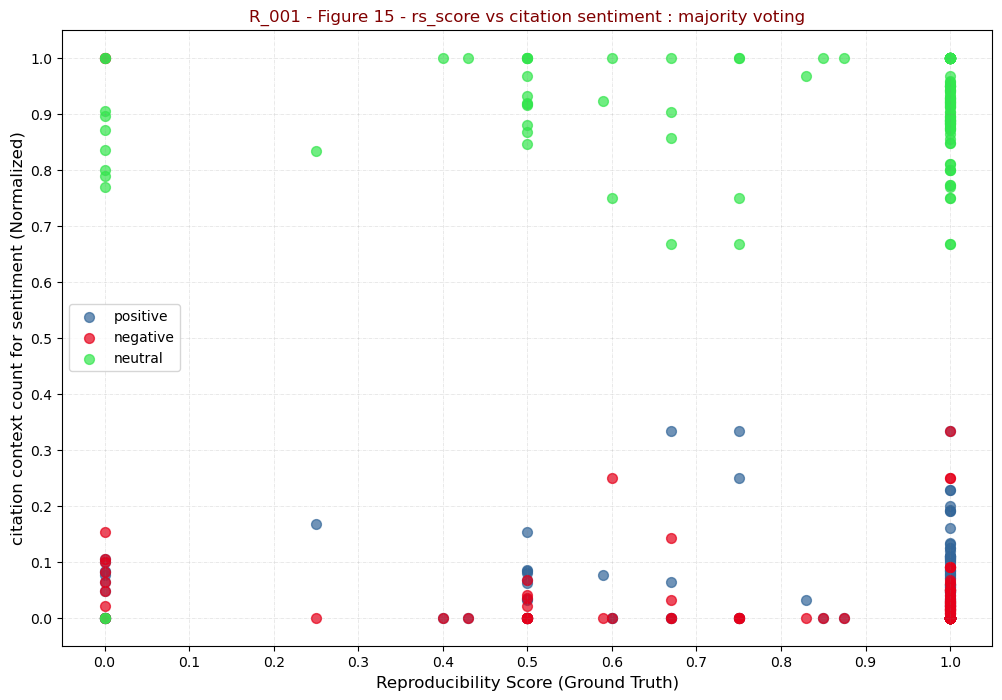

In [171]:
import matplotlib.pyplot as plt
import numpy as np

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 

data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50,label="positive") 
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50,label="negative") 
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50,label="neutral") 

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count for sentiment (Normalized)",fontsize=12)
plt.title("R_001 - Figure 15 - rs_score vs citation sentiment : majority voting", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

plt.legend(loc="center left")
plt.savefig("plots/R_001_Figure_15_rs_score_vs_citation_sentiment_majority_voting.png",pad_inches=1)
plt.show()

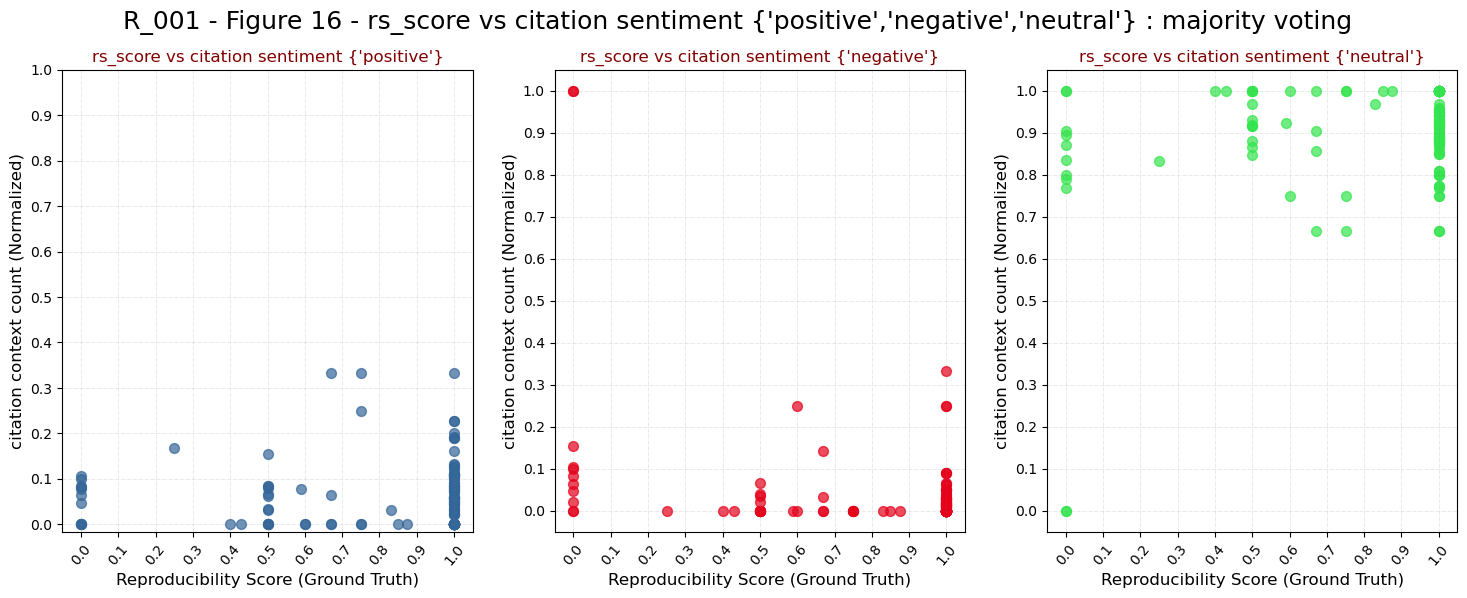

In [174]:
import matplotlib.pyplot as plt
import numpy as np

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 

data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 

fig = plt.figure(figsize = (18, 6))

plt.subplot(131)
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50) 
plt.suptitle("R_001 - Figure 16 - rs_score vs citation sentiment {'positive','negative','neutral'} : majority voting",fontsize=18)
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50)  
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(133)
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50) 
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

plt.savefig("plots/R_001_Figure_16_rs_score_vs_citation_sentiment_majority_voting.png",pad_inches=1)
plt.show()

# enitre citation context behaviour over different rs_scores 

# using single model - model 0 - our fine tuned model for citation context sentitment analysis - for only the reproducibility related citation contexts (12442)

In [10]:
all_files = {} # filename:item, filename:item 

# \R001_Fall_2023_AI_Reproducibility\sentiment_analysis\inferences_5_models

label_file_list = [i for i in glob.glob(r"sentiment_analysis/model_0_predictions/*.csv")]

label_file_list

for file in label_file_list:
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    
    label_counts = {'positive':0,'negative':0,'neutral':0}
    
    df = pd.read_csv(file)

    df_dataset_neutral = df[df['target_predict_model_0_label'] =='neutral']
    df_dataset_positive = df[df['target_predict_model_0_label'] =='positive']
    df_dataset_negative = df[df['target_predict_model_0_label'] =='negative']

    label_counts['neutral'] = len(df_dataset_neutral)
    label_counts['positive'] = len(df_dataset_positive)
    label_counts['negative'] = len(df_dataset_negative)
    
    
    
    all_files.update({file_key:label_counts})
    
    print(f"p:{label_counts['positive']} -- n:{label_counts['negative']} -- neutral:{label_counts['neutral']}")
    print()
    
    
with open("sentiment_analysis/model_0_rep_related_only_label_summary.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
p:18 -- n:1 -- neutral:14

RS_002_MLRC_2022_02
p:60 -- n:4 -- neutral:13

RS_003_MLRC_2022_03
p:3 -- n:1 -- neutral:1

RS_004_MLRC_2022_04
p:3 -- n:0 -- neutral:3

RS_005_MLRC_2022_05
p:3 -- n:0 -- neutral:0

RS_006_MLRC_2022_06
p:30 -- n:0 -- neutral:22

RS_008_MLRC_2022_08
p:3 -- n:1 -- neutral:0

RS_009_MLRC_2022_09
p:1 -- n:0 -- neutral:0

RS_011_MLRC_2022_11
p:3 -- n:0 -- neutral:3

RS_012_MLRC_2022_12
p:3 -- n:2 -- neutral:5

RS_013_MLRC_2022_13
p:7 -- n:0 -- neutral:2

RS_014_MLRC_2022_14
p:12 -- n:3 -- neutral:0

RS_016_MLRC_2022_16
p:3 -- n:0 -- neutral:3

RS_017_MLRC_2022_17
p:0 -- n:0 -- neutral:3

RS_018_MLRC_2022_18
p:7 -- n:0 -- neutral:2

RS_019_MLRC_2022_19
p:2 -- n:0 -- neutral:2

RS_020_MLRC_2022_20
p:0 -- n:1 -- neutral:0

RS_021_MLRC_2022_21
p:4 -- n:0 -- neutral:4

RS_022_MLRC_2022_22
p:0 -- n:0 -- neutral:2

RS_023_MLRC_2022_23
p:4 -- n:1 -- neutral:0

RS_024_MLRC_2022_24
p:3 -- n:0 -- neutral:3

RS_025_MLRC_2022_25
p:0 -- n:0 -- neutral:1

RS_

{'RS_001_MLRC_2022_01': {'positive': 18, 'negative': 1, 'neutral': 14},
 'RS_002_MLRC_2022_02': {'positive': 60, 'negative': 4, 'neutral': 13},
 'RS_003_MLRC_2022_03': {'positive': 3, 'negative': 1, 'neutral': 1},
 'RS_004_MLRC_2022_04': {'positive': 3, 'negative': 0, 'neutral': 3},
 'RS_005_MLRC_2022_05': {'positive': 3, 'negative': 0, 'neutral': 0},
 'RS_006_MLRC_2022_06': {'positive': 30, 'negative': 0, 'neutral': 22},
 'RS_008_MLRC_2022_08': {'positive': 3, 'negative': 1, 'neutral': 0},
 'RS_009_MLRC_2022_09': {'positive': 1, 'negative': 0, 'neutral': 0},
 'RS_011_MLRC_2022_11': {'positive': 3, 'negative': 0, 'neutral': 3},
 'RS_012_MLRC_2022_12': {'positive': 3, 'negative': 2, 'neutral': 5},
 'RS_013_MLRC_2022_13': {'positive': 7, 'negative': 0, 'neutral': 2},
 'RS_014_MLRC_2022_14': {'positive': 12, 'negative': 3, 'neutral': 0},
 'RS_016_MLRC_2022_16': {'positive': 3, 'negative': 0, 'neutral': 3},
 'RS_017_MLRC_2022_17': {'positive': 0, 'negative': 0, 'neutral': 3},
 'RS_018_MLRC

In [11]:
# R_001_Figure_015_context_score_vs_sentiment_automated_labelling
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def normalize_counts(dict_item):
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] + dict_item['neutral'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    neutral = dict_item['neutral']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
        neutral_norm = 0
    else:
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)
        neutral_norm = (neutral)/(total_citation_context_count)

    return positive_norm, negative_norm, neutral_norm, total_citation_context_count

already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("sentiment_analysis/inferences_5_models/*.csv")]
print(len(already_labelled_keys_list))
already_labelled_keys_list

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open(r'sentiment_analysis/model_0_rep_related_only_label_summary.json') as f:
    data_labels = json.load(f)
    
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
        p_norm, n_norm, ntr_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])
        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
        item.update({"neutral":data_labels[item['key_for_all_RS']]['neutral']})
        
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"ntr_norm":ntr_norm})
        item.update({"total_contexts_count":total_contexts})

        list_with_both_XY_009.append(item)


df_sentiment_single_m_realted = pd.DataFrame(list_with_both_XY_009)
df_sentiment_single_m_realted
df_sentiment_single_m_realted.to_csv('sentiment_analysis/sentiment_analysis_from_model_0_related_only.csv',index=False)
df_sentiment_single_m_realted

print('positive :', sum(df_sentiment_single_m_realted['positive']))
print('negative :', sum(df_sentiment_single_m_realted['negative']))
print('neutral :', sum(df_sentiment_single_m_realted['neutral']))

# model_1 --> there are no positives at all for all 134 datapoints
# positive : 0
# negative : 148
# neutral : 12294

# model_2 --> for all 134 cited papers
# positive : 1942
# negative : 184
# neutral : 10316

# model_3 --> for all 134 cited papers
# positive : 1487
# negative : 210
# neutral : 10745

# model_4 --> for all 134 cited papers
# positive : 1305
# negative : 369
# neutral : 10768

# model_5 --> for all 134 cited papers
# positive : 1402
# negative : 2484
# neutral : 8556

134
positive : 8385
negative : 937
neutral : 3120


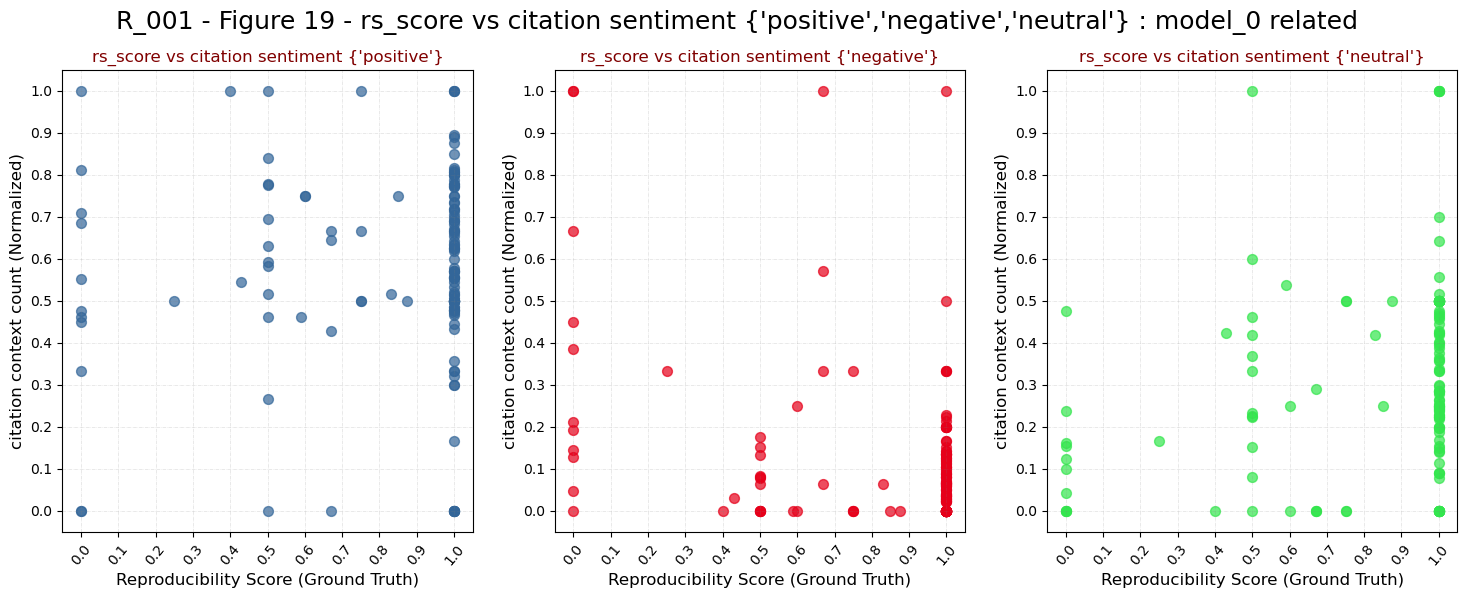

In [13]:
import matplotlib.pyplot as plt
import numpy as np

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 

data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 

fig = plt.figure(figsize = (18, 6))

plt.subplot(131)
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50) 
plt.suptitle("R_001 - Figure 19 - rs_score vs citation sentiment {'positive','negative','neutral'} : model_0 related",fontsize=18)
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

plt.subplot(132)
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

plt.subplot(133)
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50) 

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

plt.savefig("plots/R_001_Figure_19_rs_score_vs_citation_sentiment_model_0_related.png",pad_inches=1)
plt.show()

# enitre citation context behaviour over different rs_scores 

In [251]:
df_sentiment = pd.read_csv(r'sentiment_analysis/sentiment_analysis_from_model_0_related_only.csv')

df_sentiment

df_sentiment_00 = df_sentiment[(df_sentiment['rs_score']>=0)&(df_sentiment['rs_score']<0.1)]
df_sentiment_00

df_sentiment_01 = df_sentiment[(df_sentiment['rs_score']>=0.1)&(df_sentiment['rs_score']<0.2)]
df_sentiment_01

df_sentiment_02 = df_sentiment[(df_sentiment['rs_score']>=0.2)&(df_sentiment['rs_score']<0.3)]
df_sentiment_02

df_sentiment_03 = df_sentiment[(df_sentiment['rs_score']>=0.3)&(df_sentiment['rs_score']<0.4)]
df_sentiment_03

df_sentiment_04 = df_sentiment[(df_sentiment['rs_score']>=0.4)&(df_sentiment['rs_score']<0.5)]
df_sentiment_04

df_sentiment_05 = df_sentiment[(df_sentiment['rs_score']>=0.5)&(df_sentiment['rs_score']<0.6)]
df_sentiment_05

df_sentiment_06 = df_sentiment[(df_sentiment['rs_score']>=0.6)&(df_sentiment['rs_score']<0.7)]
df_sentiment_06

df_sentiment_07 = df_sentiment[(df_sentiment['rs_score']>=0.7)&(df_sentiment['rs_score']<0.8)]
df_sentiment_07

df_sentiment_08 = df_sentiment[(df_sentiment['rs_score']>=0.8)&(df_sentiment['rs_score']<0.9)]
df_sentiment_08

df_sentiment_09 = df_sentiment[(df_sentiment['rs_score']>=0.9)&(df_sentiment['rs_score']<1.0)]
df_sentiment_09

df_sentiment_10 = df_sentiment[df_sentiment['rs_score']==1.0]
df_sentiment_10

citation_context_behaviour = {}

for i in range(11): 
    df_name = f"df_sentiment_{str(i).rjust(2, '0')}"
    df_ = eval(df_name)
    print(df_)
    
    print(sum(df_['negative']))
    
    item = {}
    item.update({"number_of_cited_papers":len(df_)})
    item.update({"total_positives":sum(df_['positive'])})
    item.update({"total_negatives":sum(df_['negative'])})
    item.update({"total_neutrals":sum(df_['neutral'])})
    item.update({"rs_score":i})

    citation_context_behaviour.update({df_name:item})
    
citation_context_behaviour   

with open("sentiment_analysis/sentiment_analysis_model_0_related_only_count_summary.json", "w") as outfile: 
    json.dump(citation_context_behaviour, outfile)
    

           key_for_all_RS  rs_score  positive  negative  neutral    p_norm  \
119  RS_134_ICDAR_2018_01       0.0        50        14        9  0.684932   
120  RS_135_ICDAR_2018_02       0.0         4         0        0  1.000000   
122  RS_137_ICDAR_2018_04       0.0        10         1       10  0.476190   
123  RS_138_ICDAR_2018_05       0.0        21         8        9  0.552632   
125  RS_140_ICDAR_2018_07       0.0         1         2        0  0.333333   
126  RS_141_ICDAR_2018_08       0.0         6         5        2  0.461538   
127  RS_142_ICDAR_2018_09       0.0        22         4        5  0.709677   
130  RS_145_ICDAR_2018_12       0.0         9         9        2  0.450000   
131  RS_147_ICDAR_2018_14       0.0        39         7        2  0.812500   
132  RS_148_ICDAR_2018_15       0.0         0         1        0  0.000000   
133  RS_149_ICDAR_2018_16       0.0         0         1        0  0.000000   

       n_norm  ntr_norm  total_contexts_count  
119  0.191781  

In [252]:
sum_p = 0
for item in citation_context_behaviour.values():
    sum_p+=item['total_positives'] 
sum_p

8385

In [186]:
sum_n = 0
for item in citation_context_behaviour.values():
    sum_n+=item['total_negatives'] 
sum_n

937

In [187]:
sum_tr = 0
for item in citation_context_behaviour.values():
    sum_tr+=item['total_neutrals'] 
sum_tr

3120

In [254]:
# 5 models
df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
df_citation_context_behaviour

df_citation_context_behaviour["total_contexts"] = (df_citation_context_behaviour["total_positives"]\
                                                   +df_citation_context_behaviour["total_negatives"]\
                                                   +df_citation_context_behaviour["total_neutrals"])
df_citation_context_behaviour["avg_total_contexts_per_paper"] = ((df_citation_context_behaviour["total_positives"]\
                                                             +df_citation_context_behaviour["total_negatives"]\
                                                             +df_citation_context_behaviour["total_neutrals"])/(df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)

df_citation_context_behaviour["total_positives_per_paper"] = (df_citation_context_behaviour["total_positives"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour["total_negatives_per_paper"] = (df_citation_context_behaviour["total_negatives"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour["total_neutrals_per_paper"] = (df_citation_context_behaviour["total_neutrals"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)

df_citation_context_behaviour["total_positives_norm"] = (df_citation_context_behaviour["total_positives_per_paper"]\
                                                         / (df_citation_context_behaviour["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour["total_negatives_norm"] = (df_citation_context_behaviour["total_negatives_per_paper"]/ (df_citation_context_behaviour["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour["total_neutrals_norm"] = (df_citation_context_behaviour["total_neutrals_per_paper"]/ (df_citation_context_behaviour["avg_total_contexts_per_paper"])).fillna(0)

df_citation_context_behaviour.to_csv('sentiment_analysis/sentiment_analysis_from_model_0_related_only_rs_11_bins.csv',index=False)

df_citation_context_behaviour

,index,number_of_cited_papers,total_positives,total_negatives,total_neutrals,rs_score,total_contexts,avg_total_contexts_per_paper,total_positives_per_paper,total_negatives_per_paper,total_neutrals_per_paper,total_positives_norm,total_negatives_norm,total_neutrals_norm
0,df_sentiment_00,11,162,52,39,0,253,23.000000,14.727273,4.727273,3.545455,0.640316,0.205534,0.154150
1,df_sentiment_01,0,0,0,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,df_sentiment_02,1,3,2,1,2,6,6.000000,3.000000,2.000000,1.000000,0.500000,0.333333,0.166667
3,df_sentiment_03,0,0,0,0,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,df_sentiment_04,2,19,1,14,4,34,17.000000,9.500000,0.500000,7.000000,0.558824,0.029412,0.411765
5,df_sentiment_05,13,359,76,150,5,585,45.000000,27.615385,5.846154,11.538462,0.613675,0.129915,0.256410
6,df_sentiment_06,6,37,9,12,6,58,9.666667,6.166667,1.500000,2.000000,0.637931,0.155172,0.206897
7,df_sentiment_07,4,16,1,11,7,28,7.000000,4.000000,0.250000,2.750000,0.571429,0.035714,0.392857
8,df_sentiment_08,3,22,2,17,8,41,13.666667,7.333333,0.666667,5.666667,0.536585,0.048780,0.414634
9,df_sentiment_09,0,0,0,0,9,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


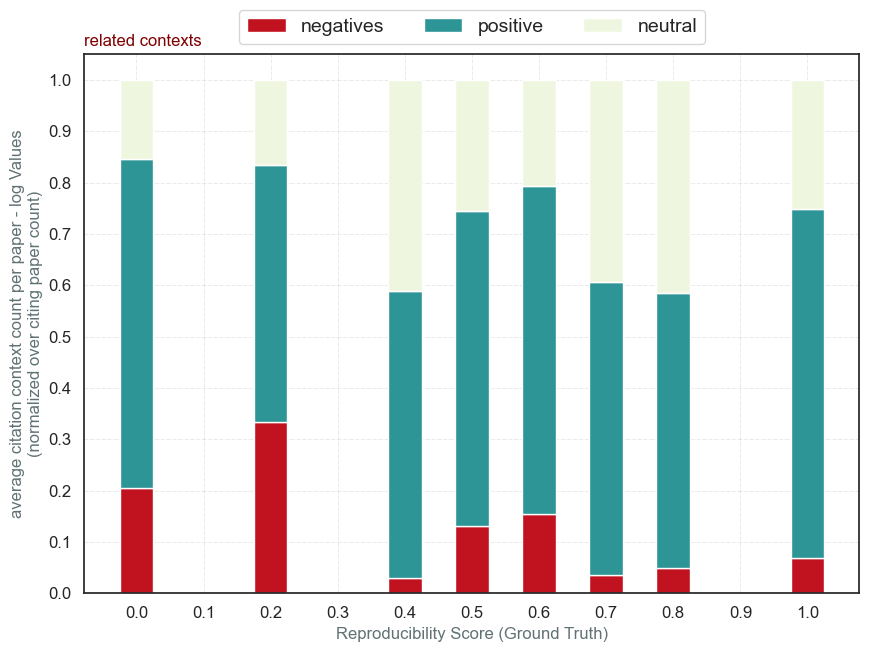

In [255]:
width = 0.05

X_axis = np.arange(0.0, 1.1, step=0.1)

positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']
neutrals = df_citation_context_behaviour['total_neutrals_norm']
other_two = df_citation_context_behaviour['total_neutrals_norm'] + df_citation_context_behaviour['total_positives_norm']

fig, ax = plt.subplots(figsize = (10, 7))
bottom = np.zeros(len(positives))

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1),fontsize=12)

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values\n(normalized over citing paper count)",fontsize=12,color='#607274')

plt.title("related contexts",fontsize=12,color='maroon', loc='left')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.legend(fontsize="14",title="sentiment",title_fontsize="x-large",fancybox=True) 

p = ax.bar(X_axis, negatives, width, label='negatives', bottom=bottom,color='#c1121f')   #e76f51
bottom += negatives
p2 = ax.bar(X_axis, positives, width, label='positive', bottom=bottom,color='#2D9596')
bottom += positives
p3 = ax.bar(X_axis, neutrals, width, label='neutral', bottom=bottom,color='#eff6e0')

ax.legend(fontsize="14",title="",title_fontsize="large",fancybox=True,loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)

plt.show()

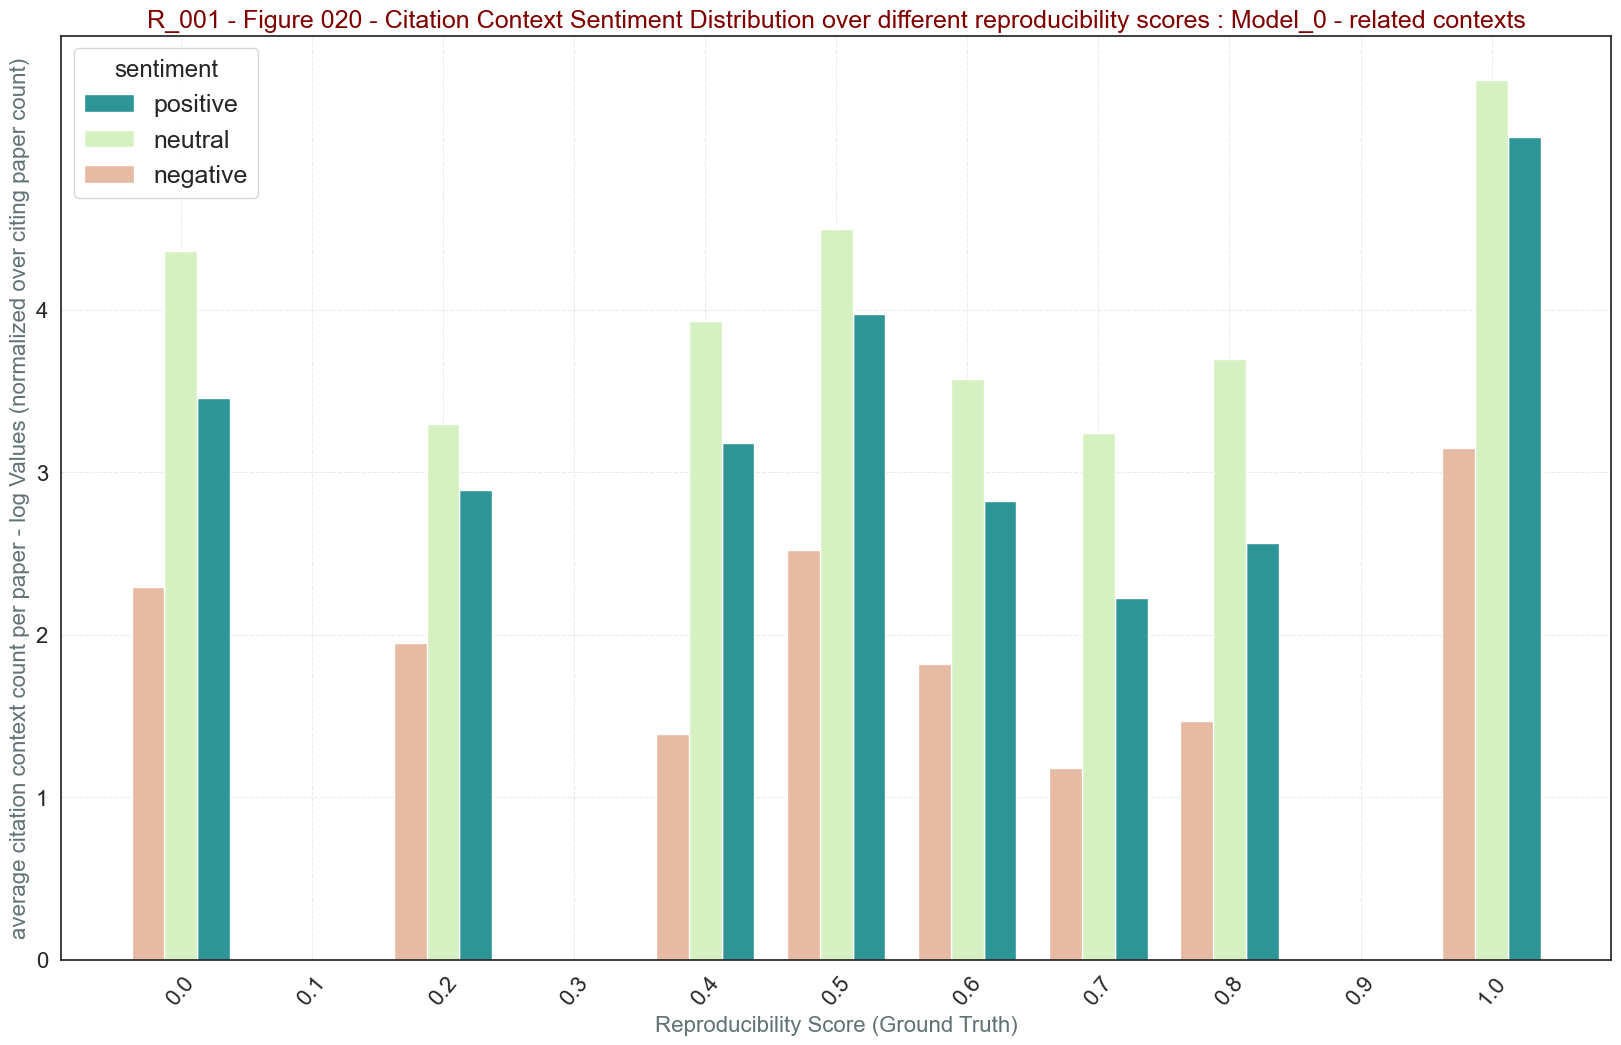

In [100]:
keys_ = df_citation_context_behaviour['rs_score']
keys_

positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']
neutrals = df_citation_context_behaviour['total_neutrals_norm']

X = keys_

fig = plt.figure(figsize = (20, 12))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50,fontsize=16)

plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025) 
plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 
plt.yticks(np.arange(0, 5, step=1),fontsize=16)
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values (normalized over citing paper count)",fontsize=16,color='#607274')
plt.title("R_001 - Figure 020 - Citation Context Sentiment Distribution over different reproducibility scores : Model_0 - related contexts",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.legend(fontsize="18",title="sentiment",title_fontsize="x-large",fancybox=True) 

plt.savefig("plots/R_001_Figure_020_Citation_Context_Sentiment_Distribution_Model_0_related_only.png",pad_inches=2)

plt.show() 

# using single model - model 0 - our fine tuned model for citation context sentitment analysis - for all citation contexts (42091)

In [42]:
all_files = {} # filename:item, filename:item 

label_file_list = [i for i in glob.glob(r"sentiment_analysis/model_0_predictions_for_all_42000/*.csv")]
label_file_list

for file in label_file_list:
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    label_counts = {'positive':0,'negative':0,'neutral':0}
    df = pd.read_csv(file)
    df_dataset_neutral = df[df['target_predict_model_0_label'] =='neutral']
    df_dataset_positive = df[df['target_predict_model_0_label'] =='positive']
    df_dataset_negative = df[df['target_predict_model_0_label'] =='negative']

    label_counts['neutral'] = len(df_dataset_neutral)
    label_counts['positive'] = len(df_dataset_positive)
    label_counts['negative'] = len(df_dataset_negative)
    
    all_files.update({file_key:label_counts})
    print(f"p:{label_counts['positive']} -- n:{label_counts['negative']} -- neutral:{label_counts['neutral']}")
    print()
    
with open("sentiment_analysis/model_0_all_42000_label_summary.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
p:42 -- n:6 -- neutral:93

RS_002_MLRC_2022_02
p:92 -- n:9 -- neutral:59

RS_003_MLRC_2022_03
p:9 -- n:3 -- neutral:22

RS_004_MLRC_2022_04
p:5 -- n:2 -- neutral:9

RS_005_MLRC_2022_05
p:8 -- n:1 -- neutral:1

RS_006_MLRC_2022_06
p:49 -- n:5 -- neutral:172

RS_008_MLRC_2022_08
p:5 -- n:1 -- neutral:15

RS_009_MLRC_2022_09
p:4 -- n:0 -- neutral:7

RS_010_MLRC_2022_10
p:0 -- n:1 -- neutral:2

RS_011_MLRC_2022_11
p:5 -- n:2 -- neutral:9

RS_012_MLRC_2022_12
p:7 -- n:2 -- neutral:47

RS_013_MLRC_2022_13
p:14 -- n:4 -- neutral:19

RS_014_MLRC_2022_14
p:14 -- n:3 -- neutral:1

RS_015_MLRC_2022_15
p:0 -- n:1 -- neutral:12

RS_016_MLRC_2022_16
p:5 -- n:2 -- neutral:9

RS_017_MLRC_2022_17
p:1 -- n:0 -- neutral:7

RS_018_MLRC_2022_18
p:14 -- n:4 -- neutral:19

RS_019_MLRC_2022_19
p:5 -- n:0 -- neutral:14

RS_020_MLRC_2022_20
p:4 -- n:8 -- neutral:14

RS_021_MLRC_2022_21
p:9 -- n:6 -- neutral:40

RS_022_MLRC_2022_22
p:4 -- n:0 -- neutral:7

RS_023_MLRC_2022_23
p:11 -- n:4 -- n

{'RS_001_MLRC_2022_01': {'positive': 42, 'negative': 6, 'neutral': 93},
 'RS_002_MLRC_2022_02': {'positive': 92, 'negative': 9, 'neutral': 59},
 'RS_003_MLRC_2022_03': {'positive': 9, 'negative': 3, 'neutral': 22},
 'RS_004_MLRC_2022_04': {'positive': 5, 'negative': 2, 'neutral': 9},
 'RS_005_MLRC_2022_05': {'positive': 8, 'negative': 1, 'neutral': 1},
 'RS_006_MLRC_2022_06': {'positive': 49, 'negative': 5, 'neutral': 172},
 'RS_008_MLRC_2022_08': {'positive': 5, 'negative': 1, 'neutral': 15},
 'RS_009_MLRC_2022_09': {'positive': 4, 'negative': 0, 'neutral': 7},
 'RS_010_MLRC_2022_10': {'positive': 0, 'negative': 1, 'neutral': 2},
 'RS_011_MLRC_2022_11': {'positive': 5, 'negative': 2, 'neutral': 9},
 'RS_012_MLRC_2022_12': {'positive': 7, 'negative': 2, 'neutral': 47},
 'RS_013_MLRC_2022_13': {'positive': 14, 'negative': 4, 'neutral': 19},
 'RS_014_MLRC_2022_14': {'positive': 14, 'negative': 3, 'neutral': 1},
 'RS_015_MLRC_2022_15': {'positive': 0, 'negative': 1, 'neutral': 12},
 'RS_0

In [44]:
# R_001_Figure_015_context_score_vs_sentiment_automated_labelling

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def normalize_counts(dict_item):
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] + dict_item['neutral'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    neutral = dict_item['neutral']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
        neutral_norm = 0
    else:
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)
        neutral_norm = (neutral)/(total_citation_context_count)

    return positive_norm, negative_norm, neutral_norm, total_citation_context_count

already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("sentiment_analysis/inferences_5_models/*.csv")]
print(len(already_labelled_keys_list))
already_labelled_keys_list

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open(r'sentiment_analysis/model_0_all_42000_label_summary.json') as f:
    data_labels = json.load(f)
    
data_labels    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
        p_norm, n_norm, ntr_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])

        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
        item.update({"neutral":data_labels[item['key_for_all_RS']]['neutral']})
        
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"ntr_norm":ntr_norm})
        item.update({"total_contexts_count":total_contexts})

        list_with_both_XY_009.append(item)

df_sentiment_single_m_realted = pd.DataFrame(list_with_both_XY_009)
df_sentiment_single_m_realted
df_sentiment_single_m_realted.to_csv('sentiment_analysis/sentiment_analysis_from_model_0_all_42000.csv',index=False)
df_sentiment_single_m_realted

print('positive :', sum(df_sentiment_single_m_realted['positive']))
print('negative :', sum(df_sentiment_single_m_realted['negative']))
print('neutral :', sum(df_sentiment_single_m_realted['neutral']))

134
positive : 15997
negative : 2411
neutral : 23613


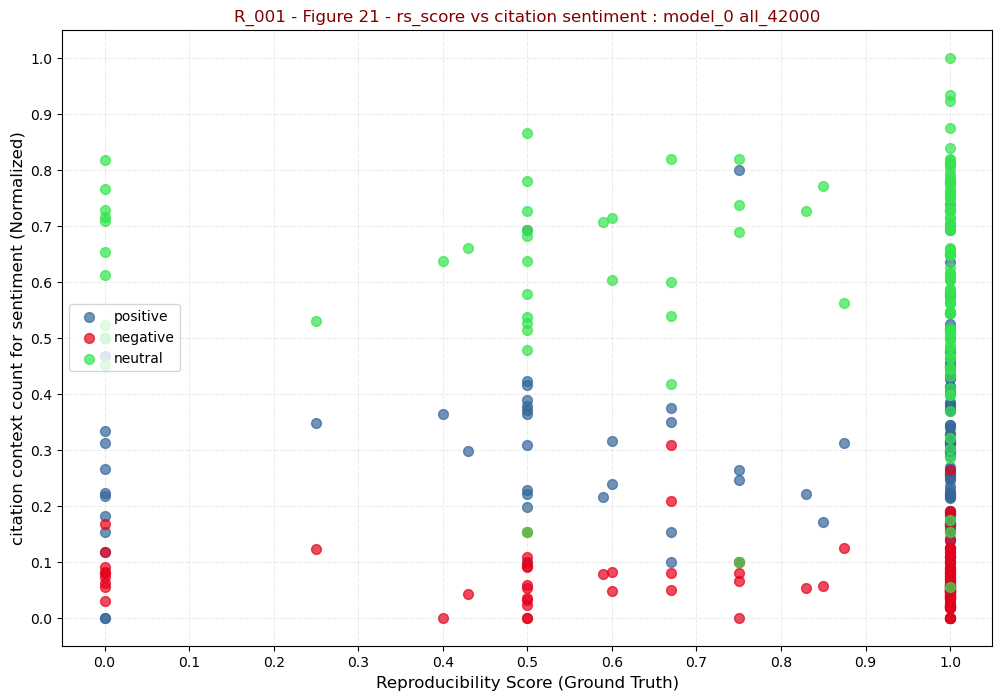

In [45]:
import matplotlib.pyplot as plt
import numpy as np

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 

data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 

fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50,label="positive") 
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50,label="negative") 
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50,label="neutral") 

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count for sentiment (Normalized)",fontsize=12)
plt.title("R_001 - Figure 21 - rs_score vs citation sentiment : model_0 all_42000", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

plt.legend(loc="center left")
plt.savefig("plots/R_001_Figure_21_rs_score_vs_citation_sentiment_model_0_all_42000.png",pad_inches=1)
plt.show()

In [173]:
# df_sentiment

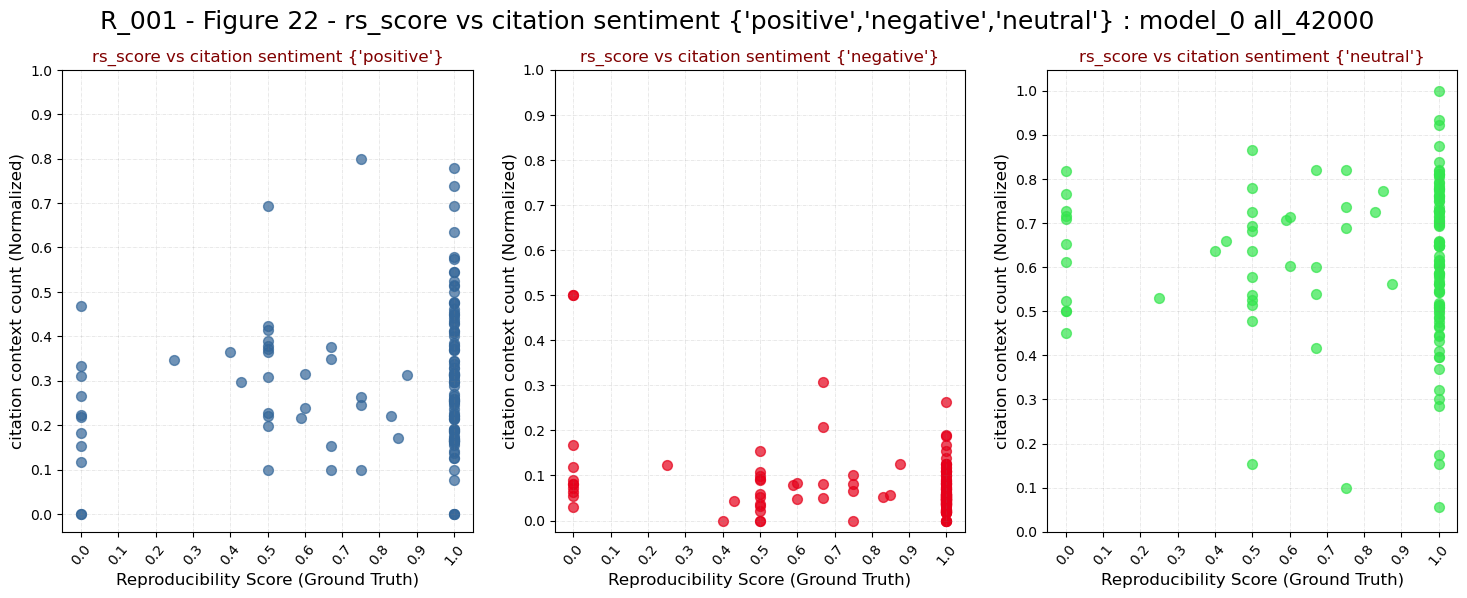

In [46]:
import matplotlib.pyplot as plt
import numpy as np

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 

data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 

fig = plt.figure(figsize = (18, 6))

plt.subplot(131)
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50) 

plt.suptitle("R_001 - Figure 22 - rs_score vs citation sentiment {'positive','negative','neutral'} : model_0 all_42000",fontsize=18)
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)


plt.subplot(132)
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50)  
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)


plt.subplot(133)
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50) 
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

plt.savefig("plots/R_001_Figure_22_rs_score_vs_citation_sentiment_model_0_all_42000.png",pad_inches=1)
plt.show()

# enitre citation context behaviour over different rs_scores for all 42091

In [561]:
df_sentiment = pd.read_csv(r'sentiment_analysis/sentiment_analysis_from_model_0_all_42000.csv')

df_sentiment

df_sentiment_00 = df_sentiment[(df_sentiment['rs_score']>=0)&(df_sentiment['rs_score']<0.1)]
df_sentiment_00

df_sentiment_01 = df_sentiment[(df_sentiment['rs_score']>=0.1)&(df_sentiment['rs_score']<0.2)]
df_sentiment_01

df_sentiment_02 = df_sentiment[(df_sentiment['rs_score']>=0.2)&(df_sentiment['rs_score']<0.3)]
df_sentiment_02

df_sentiment_03 = df_sentiment[(df_sentiment['rs_score']>=0.3)&(df_sentiment['rs_score']<0.4)]
df_sentiment_03

df_sentiment_04 = df_sentiment[(df_sentiment['rs_score']>=0.4)&(df_sentiment['rs_score']<0.5)]
df_sentiment_04

df_sentiment_05 = df_sentiment[(df_sentiment['rs_score']>=0.5)&(df_sentiment['rs_score']<0.6)]
df_sentiment_05

df_sentiment_06 = df_sentiment[(df_sentiment['rs_score']>=0.6)&(df_sentiment['rs_score']<0.7)]
df_sentiment_06

df_sentiment_07 = df_sentiment[(df_sentiment['rs_score']>=0.7)&(df_sentiment['rs_score']<0.8)]
df_sentiment_07

df_sentiment_08 = df_sentiment[(df_sentiment['rs_score']>=0.8)&(df_sentiment['rs_score']<0.9)]
df_sentiment_08

df_sentiment_09 = df_sentiment[(df_sentiment['rs_score']>=0.9)&(df_sentiment['rs_score']<1.0)]
df_sentiment_09

df_sentiment_10 = df_sentiment[df_sentiment['rs_score']==1.0]
df_sentiment_10

citation_context_behaviour = {}

for i in range(11): 
    df_name = f"df_sentiment_{str(i).rjust(2, '0')}"
    df_ = eval(df_name)
    item = {}
    item.update({"number_of_cited_papers":len(df_)})
    item.update({"total_positives":sum(df_['positive'])})
    item.update({"total_negatives":sum(df_['negative'])})
    item.update({"total_neutrals":sum(df_['neutral'])})

    item.update({"rs_score":float(i*0.1)})  
    
    citation_context_behaviour.update({df_name:item})
    
    
citation_context_behaviour   

with open("sentiment_analysis/sentiment_analysis_model_0_all_42000_count_summary.json", "w") as outfile: 
    json.dump(citation_context_behaviour, outfile)


           key_for_all_RS  rs_score  positive  negative  neutral    p_norm  \
119  RS_134_ICDAR_2018_01       0.0       107        30      345  0.221992   
120  RS_135_ICDAR_2018_02       0.0        12         4       39  0.218182   
122  RS_137_ICDAR_2018_04       0.0        21         4      112  0.153285   
123  RS_138_ICDAR_2018_05       0.0        33        10       81  0.266129   
125  RS_140_ICDAR_2018_07       0.0         4         2       16  0.181818   
126  RS_141_ICDAR_2018_08       0.0         8         8       52  0.117647   
127  RS_142_ICDAR_2018_09       0.0        43         7       79  0.333333   
130  RS_145_ICDAR_2018_12       0.0        28        15       47  0.311111   
131  RS_147_ICDAR_2018_14       0.0        81        14       78  0.468208   
132  RS_148_ICDAR_2018_15       0.0         0         2        2  0.000000   
133  RS_149_ICDAR_2018_16       0.0         0         2        2  0.000000   

       n_norm  ntr_norm  total_contexts_count  
119  0.062241  

In [562]:
sum_p = 0
for item in citation_context_behaviour.values():
    sum_p+=item['total_positives'] 
sum_p

15997

In [563]:
sum_n = 0
for item in citation_context_behaviour.values():
    sum_n+=item['total_negatives'] 
sum_n

2411

In [564]:
sum_tr = 0
for item in citation_context_behaviour.values():
    sum_tr+=item['total_neutrals'] 
sum_tr

23613

In [275]:
# 5 models
df_citation_context_behaviour_all_42000 = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
df_citation_context_behaviour_all_42000 = df_citation_context_behaviour_all_42000.reset_index()
df_citation_context_behaviour_all_42000

df_citation_context_behaviour_all_42000["total_positives_log"] = np.log(df_citation_context_behaviour_all_42000["total_positives"]+1)
df_citation_context_behaviour_all_42000["total_negatives_log"] = np.log(df_citation_context_behaviour_all_42000["total_negatives"]+1)
df_citation_context_behaviour_all_42000["total_neutrals_log"] = np.log(df_citation_context_behaviour_all_42000["total_neutrals"]+1)

df_citation_context_behaviour_all_42000["total_contexts"] = (df_citation_context_behaviour_all_42000["total_positives"]\
                                                   +df_citation_context_behaviour_all_42000["total_negatives"]\
                                                   +df_citation_context_behaviour_all_42000["total_neutrals"])
df_citation_context_behaviour_all_42000["avg_total_contexts_per_paper"] = ((df_citation_context_behaviour_all_42000["total_positives"]\
                                                             +df_citation_context_behaviour_all_42000["total_negatives"]\
                                                             +df_citation_context_behaviour_all_42000["total_neutrals"])/(df_citation_context_behaviour_all_42000["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour_all_42000["total_positives_per_paper"] = (df_citation_context_behaviour_all_42000["total_positives"]/ (df_citation_context_behaviour_all_42000["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour_all_42000["total_negatives_per_paper"] = (df_citation_context_behaviour_all_42000["total_negatives"]/ (df_citation_context_behaviour_all_42000["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour_all_42000["total_neutrals_per_paper"] = (df_citation_context_behaviour_all_42000["total_neutrals"]/ (df_citation_context_behaviour_all_42000["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour_all_42000["total_positives_norm"] = (df_citation_context_behaviour_all_42000["total_positives_per_paper"]\
                                                         / (df_citation_context_behaviour_all_42000["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour_all_42000["total_negatives_norm"] = (df_citation_context_behaviour_all_42000["total_negatives_per_paper"]/ (df_citation_context_behaviour_all_42000["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour_all_42000["total_neutrals_norm"] = (df_citation_context_behaviour_all_42000["total_neutrals_per_paper"]/ (df_citation_context_behaviour_all_42000["avg_total_contexts_per_paper"])).fillna(0)


df_citation_context_behaviour_all_42000["pos_neg_ratio_norm"] = (df_citation_context_behaviour_all_42000["total_positives_norm"]/ (df_citation_context_behaviour_all_42000["total_negatives_norm"])).fillna(0)


df_citation_context_behaviour_all_42000.to_csv('sentiment_analysis/sentiment_analysis_from_model_0_all_42000_rs_11_bins.csv',index=False)

df_citation_context_behaviour_all_42000

,index,number_of_cited_papers,total_positives,total_negatives,total_neutrals,rs_score,total_positives_log,total_negatives_log,total_neutrals_log,total_contexts,avg_total_contexts_per_paper,total_positives_per_paper,total_negatives_per_paper,total_neutrals_per_paper,total_positives_norm,total_negatives_norm,total_neutrals_norm,pos_neg_ratio_norm
0,df_sentiment_00,11,337,98,853,0.0,5.823046,4.595120,6.749931,1288,117.090909,30.636364,8.909091,77.545455,0.261646,0.076087,0.662267,3.438776
1,df_sentiment_01,0,0,0,0,0.1,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,df_sentiment_02,1,17,6,26,0.2,2.890372,1.945910,3.295837,49,49.000000,17.000000,6.000000,26.000000,0.346939,0.122449,0.530612,2.833333
3,df_sentiment_03,0,0,0,0,0.3,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,df_sentiment_04,2,46,6,100,0.4,3.850148,1.945910,4.615121,152,76.000000,23.000000,3.000000,50.000000,0.302632,0.039474,0.657895,7.666667
5,df_sentiment_05,13,678,149,1153,0.5,6.520621,5.010635,7.050989,1980,152.307692,52.153846,11.461538,88.692308,0.342424,0.075253,0.582323,4.550336
6,df_sentiment_06,6,95,31,208,0.6,4.564348,3.465736,5.342334,334,55.666667,15.833333,5.166667,34.666667,0.284431,0.092814,0.622754,3.064516
7,df_sentiment_07,4,33,9,98,0.7,3.526361,2.302585,4.595120,140,35.000000,8.250000,2.250000,24.500000,0.235714,0.064286,0.700000,3.666667
8,df_sentiment_08,3,36,10,118,0.8,3.610918,2.397895,4.779123,164,54.666667,12.000000,3.333333,39.333333,0.219512,0.060976,0.719512,3.600000
9,df_sentiment_09,0,0,0,0,0.9,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [300]:
df_ccb_removed_data_all_42000 =  df_citation_context_behaviour_all_42000[df_citation_context_behaviour_all_42000['number_of_cited_papers']>10]
df_ccb_removed_data_all_42000

,index,number_of_cited_papers,total_positives,total_negatives,total_neutrals,rs_score,total_positives_log,total_negatives_log,total_neutrals_log,total_contexts,avg_total_contexts_per_paper,total_positives_per_paper,total_negatives_per_paper,total_neutrals_per_paper,total_positives_norm,total_negatives_norm,total_neutrals_norm,pos_neg_ratio_norm
0,df_sentiment_00,11,337,98,853,0.0,5.823046,4.595120,6.749931,1288,117.090909,30.636364,8.909091,77.545455,0.261646,0.076087,0.662267,3.438776
5,df_sentiment_05,13,678,149,1153,0.5,6.520621,5.010635,7.050989,1980,152.307692,52.153846,11.461538,88.692308,0.342424,0.075253,0.582323,4.550336
10,df_sentiment_10,94,14755,2102,21057,1.0,9.599405,7.651120,9.955036,37914,403.340426,156.968085,22.361702,224.010638,0.389170,0.055441,0.555389,7.019505


In [565]:
# df_citation_context_behaviour_all_42000_binary
df_citation_context_behaviour_all_42000_binary = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')

df_citation_context_behaviour_all_42000_binary["total_contexts"] = (df_citation_context_behaviour_all_42000_binary["total_positives"]\
                                                   +df_citation_context_behaviour_all_42000_binary["total_negatives"])
df_citation_context_behaviour_all_42000_binary["avg_total_contexts_per_paper"] = ((df_citation_context_behaviour_all_42000_binary["total_positives"]\
                                                             +df_citation_context_behaviour_all_42000_binary["total_negatives"])/(df_citation_context_behaviour_all_42000_binary["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour_all_42000_binary["total_positives_per_paper"] = (df_citation_context_behaviour_all_42000_binary["total_positives"]/ (df_citation_context_behaviour_all_42000_binary["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour_all_42000_binary["total_negatives_per_paper"] = (df_citation_context_behaviour_all_42000_binary["total_negatives"]/ (df_citation_context_behaviour_all_42000_binary["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour_all_42000_binary["total_positives_norm"] = (df_citation_context_behaviour_all_42000_binary["total_positives_per_paper"]\
                                                         / (df_citation_context_behaviour_all_42000_binary["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour_all_42000_binary["total_negatives_norm"] = (df_citation_context_behaviour_all_42000_binary["total_negatives_per_paper"]/ (df_citation_context_behaviour_all_42000_binary["avg_total_contexts_per_paper"])).fillna(0)

df_citation_context_behaviour_all_42000_binary["pos_neg_ratio_norm"] = (df_citation_context_behaviour_all_42000_binary["total_positives_norm"]/ (df_citation_context_behaviour_all_42000_binary["total_negatives_norm"])).fillna(0)
df_citation_context_behaviour_all_42000_binary

,number_of_cited_papers,total_positives,total_negatives,total_neutrals,rs_score,total_contexts,avg_total_contexts_per_paper,total_positives_per_paper,total_negatives_per_paper,total_positives_norm,total_negatives_norm,pos_neg_ratio_norm
df_sentiment_00,11,337,98,853,0.0,435,39.545455,30.636364,8.909091,0.774713,0.225287,3.438776
df_sentiment_01,0,0,0,0,0.1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
df_sentiment_02,1,17,6,26,0.2,23,23.000000,17.000000,6.000000,0.739130,0.260870,2.833333
df_sentiment_03,0,0,0,0,0.3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
df_sentiment_04,2,46,6,100,0.4,52,26.000000,23.000000,3.000000,0.884615,0.115385,7.666667
df_sentiment_05,13,678,149,1153,0.5,827,63.615385,52.153846,11.461538,0.819831,0.180169,4.550336
df_sentiment_06,6,95,31,208,0.6,126,21.000000,15.833333,5.166667,0.753968,0.246032,3.064516
df_sentiment_07,4,33,9,98,0.7,42,10.500000,8.250000,2.250000,0.785714,0.214286,3.666667
df_sentiment_08,3,36,10,118,0.8,46,15.333333,12.000000,3.333333,0.782609,0.217391,3.600000
df_sentiment_09,0,0,0,0,0.9,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [566]:
df_ccb_removed_data_all_42000_binary =  df_citation_context_behaviour_all_42000_binary[df_citation_context_behaviour_all_42000_binary['number_of_cited_papers']>10]
df_ccb_removed_data_all_42000_binary

,number_of_cited_papers,total_positives,total_negatives,total_neutrals,rs_score,total_contexts,avg_total_contexts_per_paper,total_positives_per_paper,total_negatives_per_paper,total_positives_norm,total_negatives_norm,pos_neg_ratio_norm
df_sentiment_00,11,337,98,853,0.0,435,39.545455,30.636364,8.909091,0.774713,0.225287,3.438776
df_sentiment_05,13,678,149,1153,0.5,827,63.615385,52.153846,11.461538,0.819831,0.180169,4.550336
df_sentiment_10,94,14755,2102,21057,1.0,16857,179.329787,156.968085,22.361702,0.875304,0.124696,7.019505


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


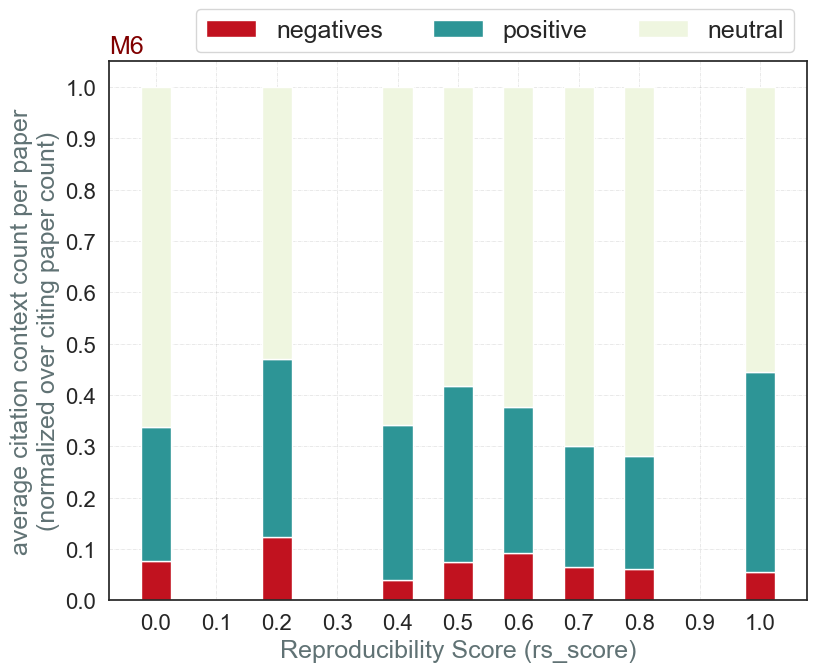

In [301]:

width = 0.05
X_axis = np.arange(0.0, 1.1, step=0.1)

positives = df_citation_context_behaviour_all_42000['total_positives_norm']
negatives = df_citation_context_behaviour_all_42000['total_negatives_norm']
neutrals = df_citation_context_behaviour_all_42000['total_neutrals_norm']
other_two = df_citation_context_behaviour_all_42000['total_neutrals_norm'] + df_citation_context_behaviour_all_42000['total_positives_norm']

fig, ax = plt.subplots(figsize = (9, 7))
bottom = np.zeros(len(positives))

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=16)
plt.yticks(np.arange(0, 1.2, step=0.1),fontsize=16)

plt.xlabel("Reproducibility Score (rs_score)",fontsize=18,color='#607274')
plt.ylabel(f"average citation context count per paper\n(normalized over citing paper count)",fontsize=18,color='#607274')
plt.title("M6",fontsize=18,color='maroon',loc='left')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.legend(fontsize="14",title="sentiment",title_fontsize="x-large",fancybox=True) 

p = ax.bar(X_axis, negatives, width, label='negatives', bottom=bottom,color='#c1121f')
bottom += negatives
p2 = ax.bar(X_axis, positives, width, label='positive', bottom=bottom,color='#2D9596')
bottom += positives
p3 = ax.bar(X_axis, neutrals, width, label='neutral', bottom=bottom,color='#eff6e0')

ax.legend(fontsize="18",title="",title_fontsize="large",fancybox=True,loc="upper right", bbox_to_anchor=(1, 1.12), ncol=3)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


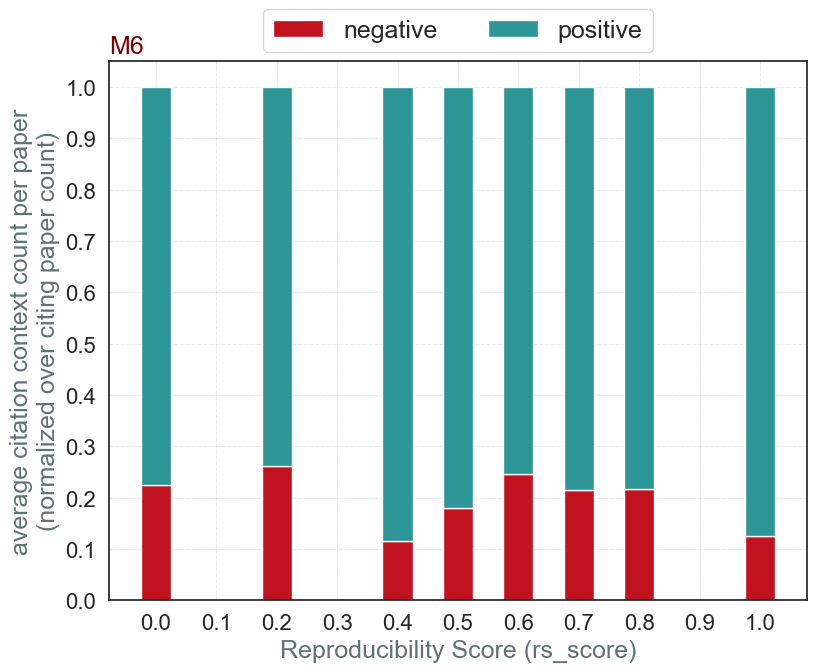

In [316]:
width = 0.05

X_axis = np.arange(0.0, 1.1, step=0.1)

positives = df_citation_context_behaviour_all_42000_binary['total_positives_norm']
negatives = df_citation_context_behaviour_all_42000_binary['total_negatives_norm']

fig, ax = plt.subplots(figsize = (9, 7))
bottom = np.zeros(len(positives))

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=16)
plt.yticks(np.arange(0, 1.2, step=0.1),fontsize=16)
plt.xlabel("Reproducibility Score (rs_score)",fontsize=18,color='#607274')
plt.ylabel(f"average citation context count per paper\n(normalized over citing paper count)",fontsize=18,color='#607274')
plt.title("M6",fontsize=18,color='maroon',loc='left')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.legend(fontsize="14",title="sentiment",title_fontsize="x-large",fancybox=True) 
p = ax.bar(X_axis, negatives, width, label='negative', bottom=bottom,color='#c1121f')
bottom += negatives
p2 = ax.bar(X_axis, positives, width, label='positive', bottom=bottom,color='#2D9596')
ax.legend(fontsize="18",title="",title_fontsize="large",fancybox=True,loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2)

plt.show()

# enitre citation context behaviour over different rs_scores 

In [553]:
# df_sentiment = pd.read_csv(r'sentiment_analysis/sa_from_model_6_related_only_with_neutrals.csv')
df_sentiment = pd.read_csv(r'sentiment_analysis/sentiment_analysis_from_model_6_related_only.csv')

df_sentiment

df_sentiment_00 = df_sentiment[(df_sentiment['rs_score']>=0)&(df_sentiment['rs_score']<0.1)]
df_sentiment_00

df_sentiment_01 = df_sentiment[(df_sentiment['rs_score']>=0.1)&(df_sentiment['rs_score']<0.2)]
df_sentiment_01

df_sentiment_02 = df_sentiment[(df_sentiment['rs_score']>=0.2)&(df_sentiment['rs_score']<0.3)]
df_sentiment_02

df_sentiment_03 = df_sentiment[(df_sentiment['rs_score']>=0.3)&(df_sentiment['rs_score']<0.4)]
df_sentiment_03

df_sentiment_04 = df_sentiment[(df_sentiment['rs_score']>=0.4)&(df_sentiment['rs_score']<0.5)]
df_sentiment_04

df_sentiment_05 = df_sentiment[(df_sentiment['rs_score']>=0.5)&(df_sentiment['rs_score']<0.6)]
df_sentiment_05

df_sentiment_06 = df_sentiment[(df_sentiment['rs_score']>=0.6)&(df_sentiment['rs_score']<0.7)]
df_sentiment_06

df_sentiment_07 = df_sentiment[(df_sentiment['rs_score']>=0.7)&(df_sentiment['rs_score']<0.8)]
df_sentiment_07

df_sentiment_08 = df_sentiment[(df_sentiment['rs_score']>=0.8)&(df_sentiment['rs_score']<0.9)]
df_sentiment_08

df_sentiment_09 = df_sentiment[(df_sentiment['rs_score']>=0.9)&(df_sentiment['rs_score']<1.0)]
df_sentiment_09

df_sentiment_10 = df_sentiment[df_sentiment['rs_score']==1.0]
df_sentiment_10

# citation_context_behaviour_m72_with_unrelated = {}
citation_context_behaviour = {}

for i in range(11): 
    df_name = f"df_sentiment_{str(i).rjust(2, '0')}"
    df_ = eval(df_name)
    print(df_)
    
    print(sum(df_['negative']))
    
    
    item = {}
    item.update({"number_of_cited_papers":len(df_)})
    item.update({"total_positives":sum(df_['positive'])})
    item.update({"total_negatives":sum(df_['negative'])})
    item.update({"rs_score":float(i*0.1)})

    citation_context_behaviour.update({df_name:item})
    
citation_context_behaviour   

           key_for_all_RS  rs_score  positive  negative    p_norm    n_norm  \
119  RS_134_ICDAR_2018_01       0.0        49        24  0.671233  0.328767   
120  RS_135_ICDAR_2018_02       0.0         2         2  0.500000  0.500000   
122  RS_137_ICDAR_2018_04       0.0        19         2  0.904762  0.095238   
123  RS_138_ICDAR_2018_05       0.0        29         9  0.763158  0.236842   
125  RS_140_ICDAR_2018_07       0.0         2         1  0.666667  0.333333   
126  RS_141_ICDAR_2018_08       0.0        10         3  0.769231  0.230769   
127  RS_142_ICDAR_2018_09       0.0        25         6  0.806452  0.193548   
130  RS_145_ICDAR_2018_12       0.0        14         6  0.700000  0.300000   
131  RS_147_ICDAR_2018_14       0.0        31        17  0.645833  0.354167   
132  RS_148_ICDAR_2018_15       0.0         0         1  0.000000  1.000000   
133  RS_149_ICDAR_2018_16       0.0         0         1  0.000000  1.000000   

     total_contexts_count  
119                    

{'df_sentiment_00': {'number_of_cited_papers': 11,
  'total_positives': 181,
  'total_negatives': 72,
  'rs_score': 0.0},
 'df_sentiment_01': {'number_of_cited_papers': 0,
  'total_positives': 0,
  'total_negatives': 0,
  'rs_score': 0.1},
 'df_sentiment_02': {'number_of_cited_papers': 1,
  'total_positives': 2,
  'total_negatives': 4,
  'rs_score': 0.2},
 'df_sentiment_03': {'number_of_cited_papers': 0,
  'total_positives': 0,
  'total_negatives': 0,
  'rs_score': 0.30000000000000004},
 'df_sentiment_04': {'number_of_cited_papers': 2,
  'total_positives': 32,
  'total_negatives': 2,
  'rs_score': 0.4},
 'df_sentiment_05': {'number_of_cited_papers': 13,
  'total_positives': 470,
  'total_negatives': 115,
  'rs_score': 0.5},
 'df_sentiment_06': {'number_of_cited_papers': 6,
  'total_positives': 47,
  'total_negatives': 11,
  'rs_score': 0.6000000000000001},
 'df_sentiment_07': {'number_of_cited_papers': 4,
  'total_positives': 26,
  'total_negatives': 2,
  'rs_score': 0.7000000000000001

In [554]:
sum_p = 0
for item in citation_context_behaviour.values():
# for item in citation_context_behaviour_m72_with_unrelated.values():
    sum_p+=item['total_positives'] 
sum_p

10457

In [555]:
sum_n = 0
for item in citation_context_behaviour.values():
# for item in citation_context_behaviour_m72_with_unrelated.values():
    sum_n+=item['total_negatives'] 
sum_n

1985

In [1]:
# sum_n = 0
# for item in citation_context_behaviour.values():
# # for item in citation_context_behaviour_m72_with_unrelated.values():
#     sum_n+=item['total_neutrals'] 
# sum_n

In [556]:
df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
df_citation_context_behaviour

df_citation_context_behaviour["total_contexts"] = (df_citation_context_behaviour["total_positives"]\
                                                   +df_citation_context_behaviour["total_negatives"])
df_citation_context_behaviour["avg_total_contexts_per_paper"] = ((df_citation_context_behaviour["total_positives"]\
                                                             +df_citation_context_behaviour["total_negatives"])/(df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour["total_positives_per_paper"] = (df_citation_context_behaviour["total_positives"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour["total_negatives_per_paper"] = (df_citation_context_behaviour["total_negatives"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour["total_positives_norm"] = (df_citation_context_behaviour["total_positives_per_paper"]\
                                                         / (df_citation_context_behaviour["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour["total_negatives_norm"] = (df_citation_context_behaviour["total_negatives_per_paper"]/ (df_citation_context_behaviour["avg_total_contexts_per_paper"])).fillna(0)

df_citation_context_behaviour["pos_neg_ratio_norm"] = (df_citation_context_behaviour["total_positives_norm"]/ (df_citation_context_behaviour["total_negatives_norm"])).fillna(0)

df_citation_context_behaviour.to_csv('sentiment_analysis/sentiment_analysis_from_model_6_related_only_rs_11_bins.csv',index=False)

df_citation_context_behaviour

,index,number_of_cited_papers,total_positives,total_negatives,rs_score,total_contexts,avg_total_contexts_per_paper,total_positives_per_paper,total_negatives_per_paper,total_positives_norm,total_negatives_norm,pos_neg_ratio_norm
0,df_sentiment_00,11,181,72,0.0,253,23.000000,16.454545,6.545455,0.715415,0.284585,2.513889
1,df_sentiment_01,0,0,0,0.1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,df_sentiment_02,1,2,4,0.2,6,6.000000,2.000000,4.000000,0.333333,0.666667,0.500000
3,df_sentiment_03,0,0,0,0.3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,df_sentiment_04,2,32,2,0.4,34,17.000000,16.000000,1.000000,0.941176,0.058824,16.000000
5,df_sentiment_05,13,470,115,0.5,585,45.000000,36.153846,8.846154,0.803419,0.196581,4.086957
6,df_sentiment_06,6,47,11,0.6,58,9.666667,7.833333,1.833333,0.810345,0.189655,4.272727
7,df_sentiment_07,4,26,2,0.7,28,7.000000,6.500000,0.500000,0.928571,0.071429,13.000000
8,df_sentiment_08,3,33,8,0.8,41,13.666667,11.000000,2.666667,0.804878,0.195122,4.125000
9,df_sentiment_09,0,0,0,0.9,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [557]:
df_ccb_removed_data =  df_citation_context_behaviour[df_citation_context_behaviour['number_of_cited_papers']>10]
df_ccb_removed_data

,index,number_of_cited_papers,total_positives,total_negatives,rs_score,total_contexts,avg_total_contexts_per_paper,total_positives_per_paper,total_negatives_per_paper,total_positives_norm,total_negatives_norm,pos_neg_ratio_norm
0,df_sentiment_00,11,181,72,0.0,253,23.000000,16.454545,6.545455,0.715415,0.284585,2.513889
5,df_sentiment_05,13,470,115,0.5,585,45.000000,36.153846,8.846154,0.803419,0.196581,4.086957
10,df_sentiment_10,94,9666,1771,1.0,11437,121.670213,102.829787,18.840426,0.845152,0.154848,5.457933


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


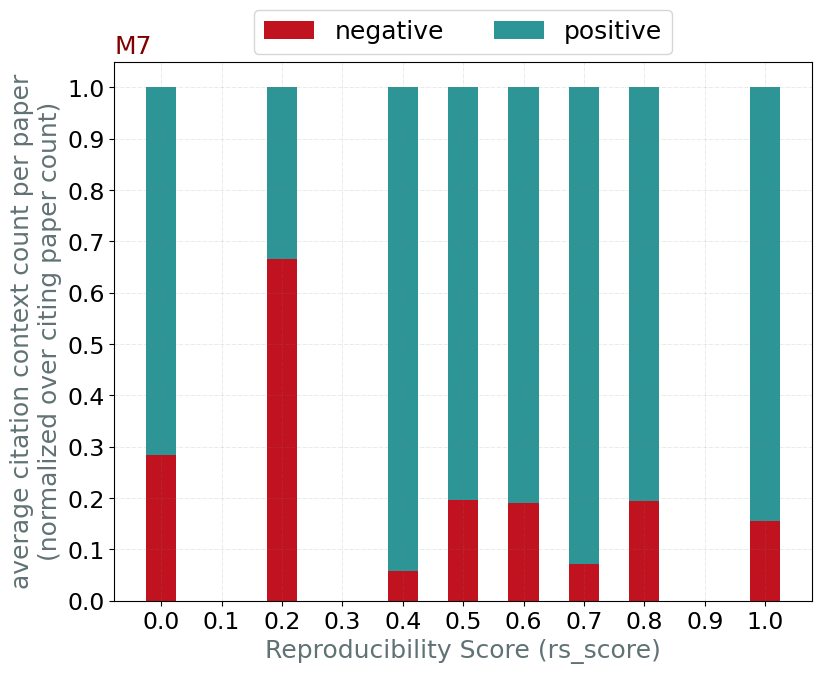

In [558]:
width = 0.05

X_axis = np.arange(0.0, 1.1, step=0.1)
positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']

fig, ax = plt.subplots(figsize = (9, 7))
bottom = np.zeros(len(positives))

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=17)
plt.yticks(np.arange(0, 1.1, step=0.1),fontsize=17)
plt.xlabel("Reproducibility Score (rs_score)",fontsize=18,color='#607274')
plt.ylabel(f"average citation context count per paper\n(normalized over citing paper count)",fontsize=18,color='#607274')

plt.title("M7",fontsize=18,color='maroon', loc='left')
plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.legend(fontsize="14",title="sentiment",title_fontsize="x-large",fancybox=True) 

p = ax.bar(X_axis, negatives, width, label='negative', bottom=bottom,color='#c1121f')   #e76f51
bottom += negatives
p2 = ax.bar(X_axis, positives, width, label='positive', bottom=bottom,color='#2D9596')

ax.legend(fontsize="18",title="",title_fontsize="large",fancybox=True,loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


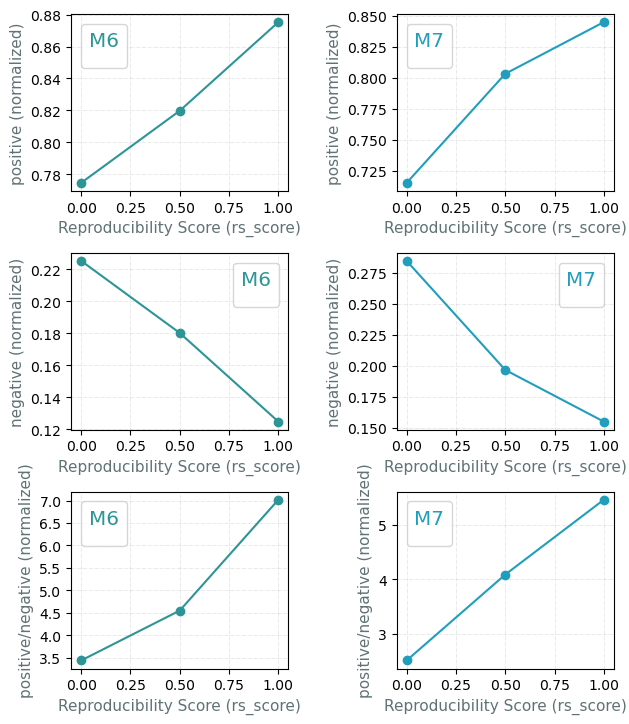

In [587]:
# Dr Wu's idea
import matplotlib.pyplot as plt
import numpy as np

keys_ = df_citation_context_behaviour['rs_score']
X_axis = keys_
 
plt.figure(figsize = (7, 8.5))
plt.tight_layout()
plt.subplots_adjust(hspace=0.35,wspace=0.5)

plt.subplot(322)
p1 = plt.plot(df_ccb_removed_data['rs_score'], df_ccb_removed_data['total_positives_norm'], linestyle='-', marker='o',color='#219ebc')
# plt.xticks(keys_,rotation=50)
# plt.yticks(np.arange(0.6, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"positive (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
legend =plt.legend(fontsize="14",title="M7",title_fontsize="x-large",fancybox=True,loc="upper left")
plt.setp(legend.get_title(), color='#219ebc')

plt.subplot(324)
p2 = plt.plot(df_ccb_removed_data['rs_score'], df_ccb_removed_data['total_negatives_norm'], linestyle='-', marker='o',color='#219ebc')
# plt.xticks(keys_,rotation=50)
# plt.yticks(np.arange(0.0, 0.5, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"negative (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
legend =plt.legend(fontsize="14",title="M7",title_fontsize="x-large",fancybox=True,loc="upper right")
plt.setp(legend.get_title(), color='#219ebc')

plt.subplot(326)
p2 = plt.plot(df_ccb_removed_data['rs_score'], df_ccb_removed_data['pos_neg_ratio_norm'], linestyle='-', marker='o',color='#219ebc')
# plt.xticks(keys_,rotation=50)
# plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"positive/negative (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'positive/negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
legend =plt.legend(fontsize="14",title="M7",title_fontsize="x-large",fancybox=True,loc="upper left")
plt.setp(legend.get_title(), color='#219ebc')



# ---------------- all 42000 below
plt.subplot(321)
p1 = plt.plot(df_ccb_removed_data_all_42000_binary['rs_score'], df_ccb_removed_data_all_42000_binary['total_positives_norm'], linestyle='-', marker='o',color='#2D9596')
# plt.xticks(keys_,rotation=50)
# plt.yticks(np.arange(0.1, 0.4, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"positive (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
legend =plt.legend(fontsize="14",title="M6",title_fontsize="x-large",fancybox=True,loc="upper left")
plt.setp(legend.get_title(), color='#2D9596')

plt.subplot(323)
p2 = plt.plot(df_ccb_removed_data_all_42000_binary['rs_score'], df_ccb_removed_data_all_42000_binary['total_negatives_norm'], linestyle='-', marker='o',color='#2D9596')
# plt.xticks(keys_,rotation=50)
# plt.yticks(np.arange(0.0, 0.5, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"negative (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
legend =plt.legend(fontsize="14",title="M6",title_fontsize="x-large",fancybox=True,loc="upper right")
plt.setp(legend.get_title(), color='#2D9596')


plt.subplot(325)
p2 = plt.plot(df_ccb_removed_data_all_42000_binary['rs_score'], df_ccb_removed_data_all_42000_binary['pos_neg_ratio_norm'], linestyle='-', marker='o',color='#2D9596')
# plt.xticks(keys_,rotation=50)
plt.yticks(np.arange(3.5, 7.01, step=0.5))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"positive/negative (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'positive/negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
# plt.legend()
legend =plt.legend(fontsize="14",title="M6",title_fontsize="x-large",fancybox=True,loc="upper left")
plt.setp(legend.get_title(), color='#2D9596')


plt.show()

In [406]:
df_ccb_removed_data_all_42000

,index,number_of_cited_papers,total_positives,total_negatives,total_neutrals,rs_score,total_positives_log,total_negatives_log,total_neutrals_log,total_contexts,avg_total_contexts_per_paper,total_positives_per_paper,total_negatives_per_paper,total_neutrals_per_paper,total_positives_norm,total_negatives_norm,total_neutrals_norm
0,df_sentiment_00,11,337,98,853,0,5.823046,4.595120,6.749931,1288,117.090909,30.636364,8.909091,77.545455,0.261646,0.076087,0.662267
5,df_sentiment_05,13,678,149,1153,5,6.520621,5.010635,7.050989,1980,152.307692,52.153846,11.461538,88.692308,0.342424,0.075253,0.582323
10,df_sentiment_10,94,14755,2102,21057,10,9.599405,7.651120,9.955036,37914,403.340426,156.968085,22.361702,224.010638,0.389170,0.055441,0.555389
